# EDA -Credit Default Risk Probability

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv('dataset.csv', sep=';')

In [281]:
df.sample(5)

uuid default  \
2029   3692926b-8d80-4997-9764-e4feaa56e4a4     0.0   
78649  7a8a7894-73a0-4da0-9ff0-10936b851ba1     0.0   
71703  848b2e94-6612-4f66-86a2-9684926808c3     0.0   
40517  27ce9325-2b60-42b2-8a57-5591e679e07f     0.0   
11771  99b974e1-9cb1-4083-a63b-9c07742276eb     0.0   

       account_amount_added_12_24m  account_days_in_dc_12_24m  \
2029                             0                        0.0   
78649                            0                        0.0   
71703                       121194                        0.0   
40517                         5497                        0.0   
11771                            0                        0.0   

       account_days_in_rem_12_24m  account_days_in_term_12_24m  \
2029                          0.0                          0.0   
78649                         0.0                          0.0   
71703                        79.0                         14.0   
40517                         0.0                          0.0   
11771                         0.0                          0.0   

       account_incoming_debt_vs_paid_0_24m account_status  \
2029                                   NaN            nan   
78649                                  NaN            nan   
71703                             0.327463            1.0   
40517                             0.000000            1.0   
11771                                  NaN            nan   

      account_worst_status_0_3m account_worst_status_12_24m  ...  \
2029                        nan                         nan  ...   
78649                       nan                         nan  ...   
71703                       2.0                         3.0  ...   
40517                       1.0                         1.0  ...   
11771                       nan                         nan  ...   

      status_3rd_last_archived_0_24m status_max_archived_0_6_months  \
2029                               1                              0   
78649                              1                              0   
71703                              1                              2   
40517                              0                              0   
11771                              0                              0   

       status_max_archived_0_12_months  status_max_archived_0_24_months  \
2029                                 1                                1   
78649                                1                                1   
71703                                2                                2   
40517                                0                                0   
11771                                0                                0   

       recovery_debt sum_capital_paid_account_0_12m  \
2029               0                              0   
78649              0                              0   
71703              0                           8710   
40517              0                              0   
11771              0                              0   

      sum_capital_paid_account_12_24m sum_paid_inv_0_12m  time_hours  \
2029                                0              29130   11.048056   
78649                               0              13445   18.265833   
71703                           76561               3944   19.156111   
40517                            5549                  0   14.872500   
11771                               0                  0   15.698611   

       worst_status_active_inv  
2029                       nan  
78649                      nan  
71703                      nan  
40517                      nan  
11771                      nan  

[5 rows x 43 columns]

## Understand the data

In [5]:
df.shape

(99976, 43)

In [6]:
df.columns

Index(['uuid', 'default', 'account_amount_added_12_24m',
       'account_days_in_dc_12_24m', 'account_days_in_rem_12_24m',
       'account_days_in_term_12_24m', 'account_incoming_debt_vs_paid_0_24m',
       'account_status', 'account_worst_status_0_3m',
       'account_worst_status_12_24m', 'account_worst_status_3_6m',
       'account_worst_status_6_12m', 'age', 'avg_payment_span_0_12m',
       'avg_payment_span_0_3m', 'merchant_category', 'merchant_group',
       'has_paid', 'max_paid_inv_0_12m', 'max_paid_inv_0_24m', 'name_in_email',
       'num_active_div_by_paid_inv_0_12m', 'num_active_inv',
       'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m',
       'num_arch_ok_12_24m', 'num_arch_rem_0_12m',
       'num_arch_written_off_0_12m', 'num_arch_written_off_12_24m',
       'num_unpaid_bills', 'status_last_archived_0_24m',
       'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m',
       'status_max_archived_0_6_months', 'status_max_archived_0_12_months',

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   uuid                                 99976 non-null  object 
 1   default                              89976 non-null  float64
 2   account_amount_added_12_24m          99976 non-null  int64  
 3   account_days_in_dc_12_24m            88140 non-null  float64
 4   account_days_in_rem_12_24m           88140 non-null  float64
 5   account_days_in_term_12_24m          88140 non-null  float64
 6   account_incoming_debt_vs_paid_0_24m  40661 non-null  float64
 7   account_status                       45603 non-null  float64
 8   account_worst_status_0_3m            45603 non-null  float64
 9   account_worst_status_12_24m          33215 non-null  float64
 10  account_worst_status_3_6m            42274 non-null  float64
 11  account_worst_status_6_12m  

In [9]:
na_cols = df.columns[df.isna().any()].tolist()

In [101]:
df.isnull().sum()

uuid                                       0
default                                    0
account_amount_added_12_24m                0
account_days_in_dc_12_24m              11836
account_days_in_rem_12_24m             10000
account_days_in_term_12_24m            11836
account_incoming_debt_vs_paid_0_24m    59315
account_status                             0
account_worst_status_0_3m                  0
account_worst_status_12_24m                0
account_worst_status_3_6m                  0
account_worst_status_6_12m                 0
age                                        0
avg_payment_span_0_12m                 10000
avg_payment_span_0_3m                  10000
merchant_category                          0
merchant_group                             0
has_paid                                   0
max_paid_inv_0_12m                         0
max_paid_inv_0_24m                         0
name_in_email                              0
num_active_div_by_paid_inv_0_12m       10000
num_active

# EDA
https://towardsdatascience.com/semi-automated-exploratory-data-analysis-eda-in-python-7f96042c9809
https://seaborn.pydata.org/tutorial/axis_grids.html
https://seaborn.pydata.org/tutorial/axis_grids.html
https://towardsdatascience.com/semi-automated-exploratory-data-analysis-eda-in-python-7f96042c9809


- Plot count plot for all categorical variables
- Categorical Variables → Bar chart
- Numerical Variables → histogram
- Numerical vs. Numerical → heat map or pairplot
- Categorical vs. Categorical → countplot with hue
- Categorical vs. Numerical → boxplot or pairplot with hue

## Preparation
### 1. Find numeric and categorical features

In [21]:
cat_cols = ['uuid','default','account_status', 'account_worst_status_0_3m', 'account_worst_status_12_24m', 
               'account_worst_status_3_6m', 'account_worst_status_6_12m', 'worst_status_active_inv',
            'status_last_archived_0_24m', 'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m',
            'status_max_archived_0_6_months', 'status_max_archived_0_12_months', 'status_max_archived_0_24_months',
            'has_paid','name_in_email', 'merchant_group','merchant_category']

In [22]:
#convert the catogorical columns to string for group by in visualisations
for c in cat_cols:
    df[c]= df[c].values.astype(str)

In [23]:
#numeric features
#num_features = df.select_dtypes(include='number').columns.tolist()
num_features= [col for col in df.columns.tolist() if col not in cat_cols]

num_cols = num_features + ['default'] # keep default columns for plotting use

In [26]:
cat_features = cat_cols[2:] #drop uuid and default

In [28]:
cat_features 

['account_status',
 'account_worst_status_0_3m',
 'account_worst_status_12_24m',
 'account_worst_status_3_6m',
 'account_worst_status_6_12m',
 'worst_status_active_inv',
 'status_last_archived_0_24m',
 'status_2nd_last_archived_0_24m',
 'status_3rd_last_archived_0_24m',
 'status_max_archived_0_6_months',
 'status_max_archived_0_12_months',
 'status_max_archived_0_24_months',
 'has_paid',
 'name_in_email',
 'merchant_group',
 'merchant_category']

## Categorical Features : Count plot

In [29]:
cols1 = ['account_status', 'account_worst_status_0_3m', 'account_worst_status_12_24m', 
               'account_worst_status_3_6m', 'account_worst_status_6_12m', 'worst_status_active_inv']
cols2 = ['status_last_archived_0_24m', 'status_2nd_last_archived_0_24m', 'status_3rd_last_archived_0_24m',
              'status_max_archived_0_6_months', 'status_max_archived_0_12_months', 'status_max_archived_0_24_months']
cols3 = ['default','has_paid','name_in_email','worst_status_active_inv', 'merchant_group','merchant_category']

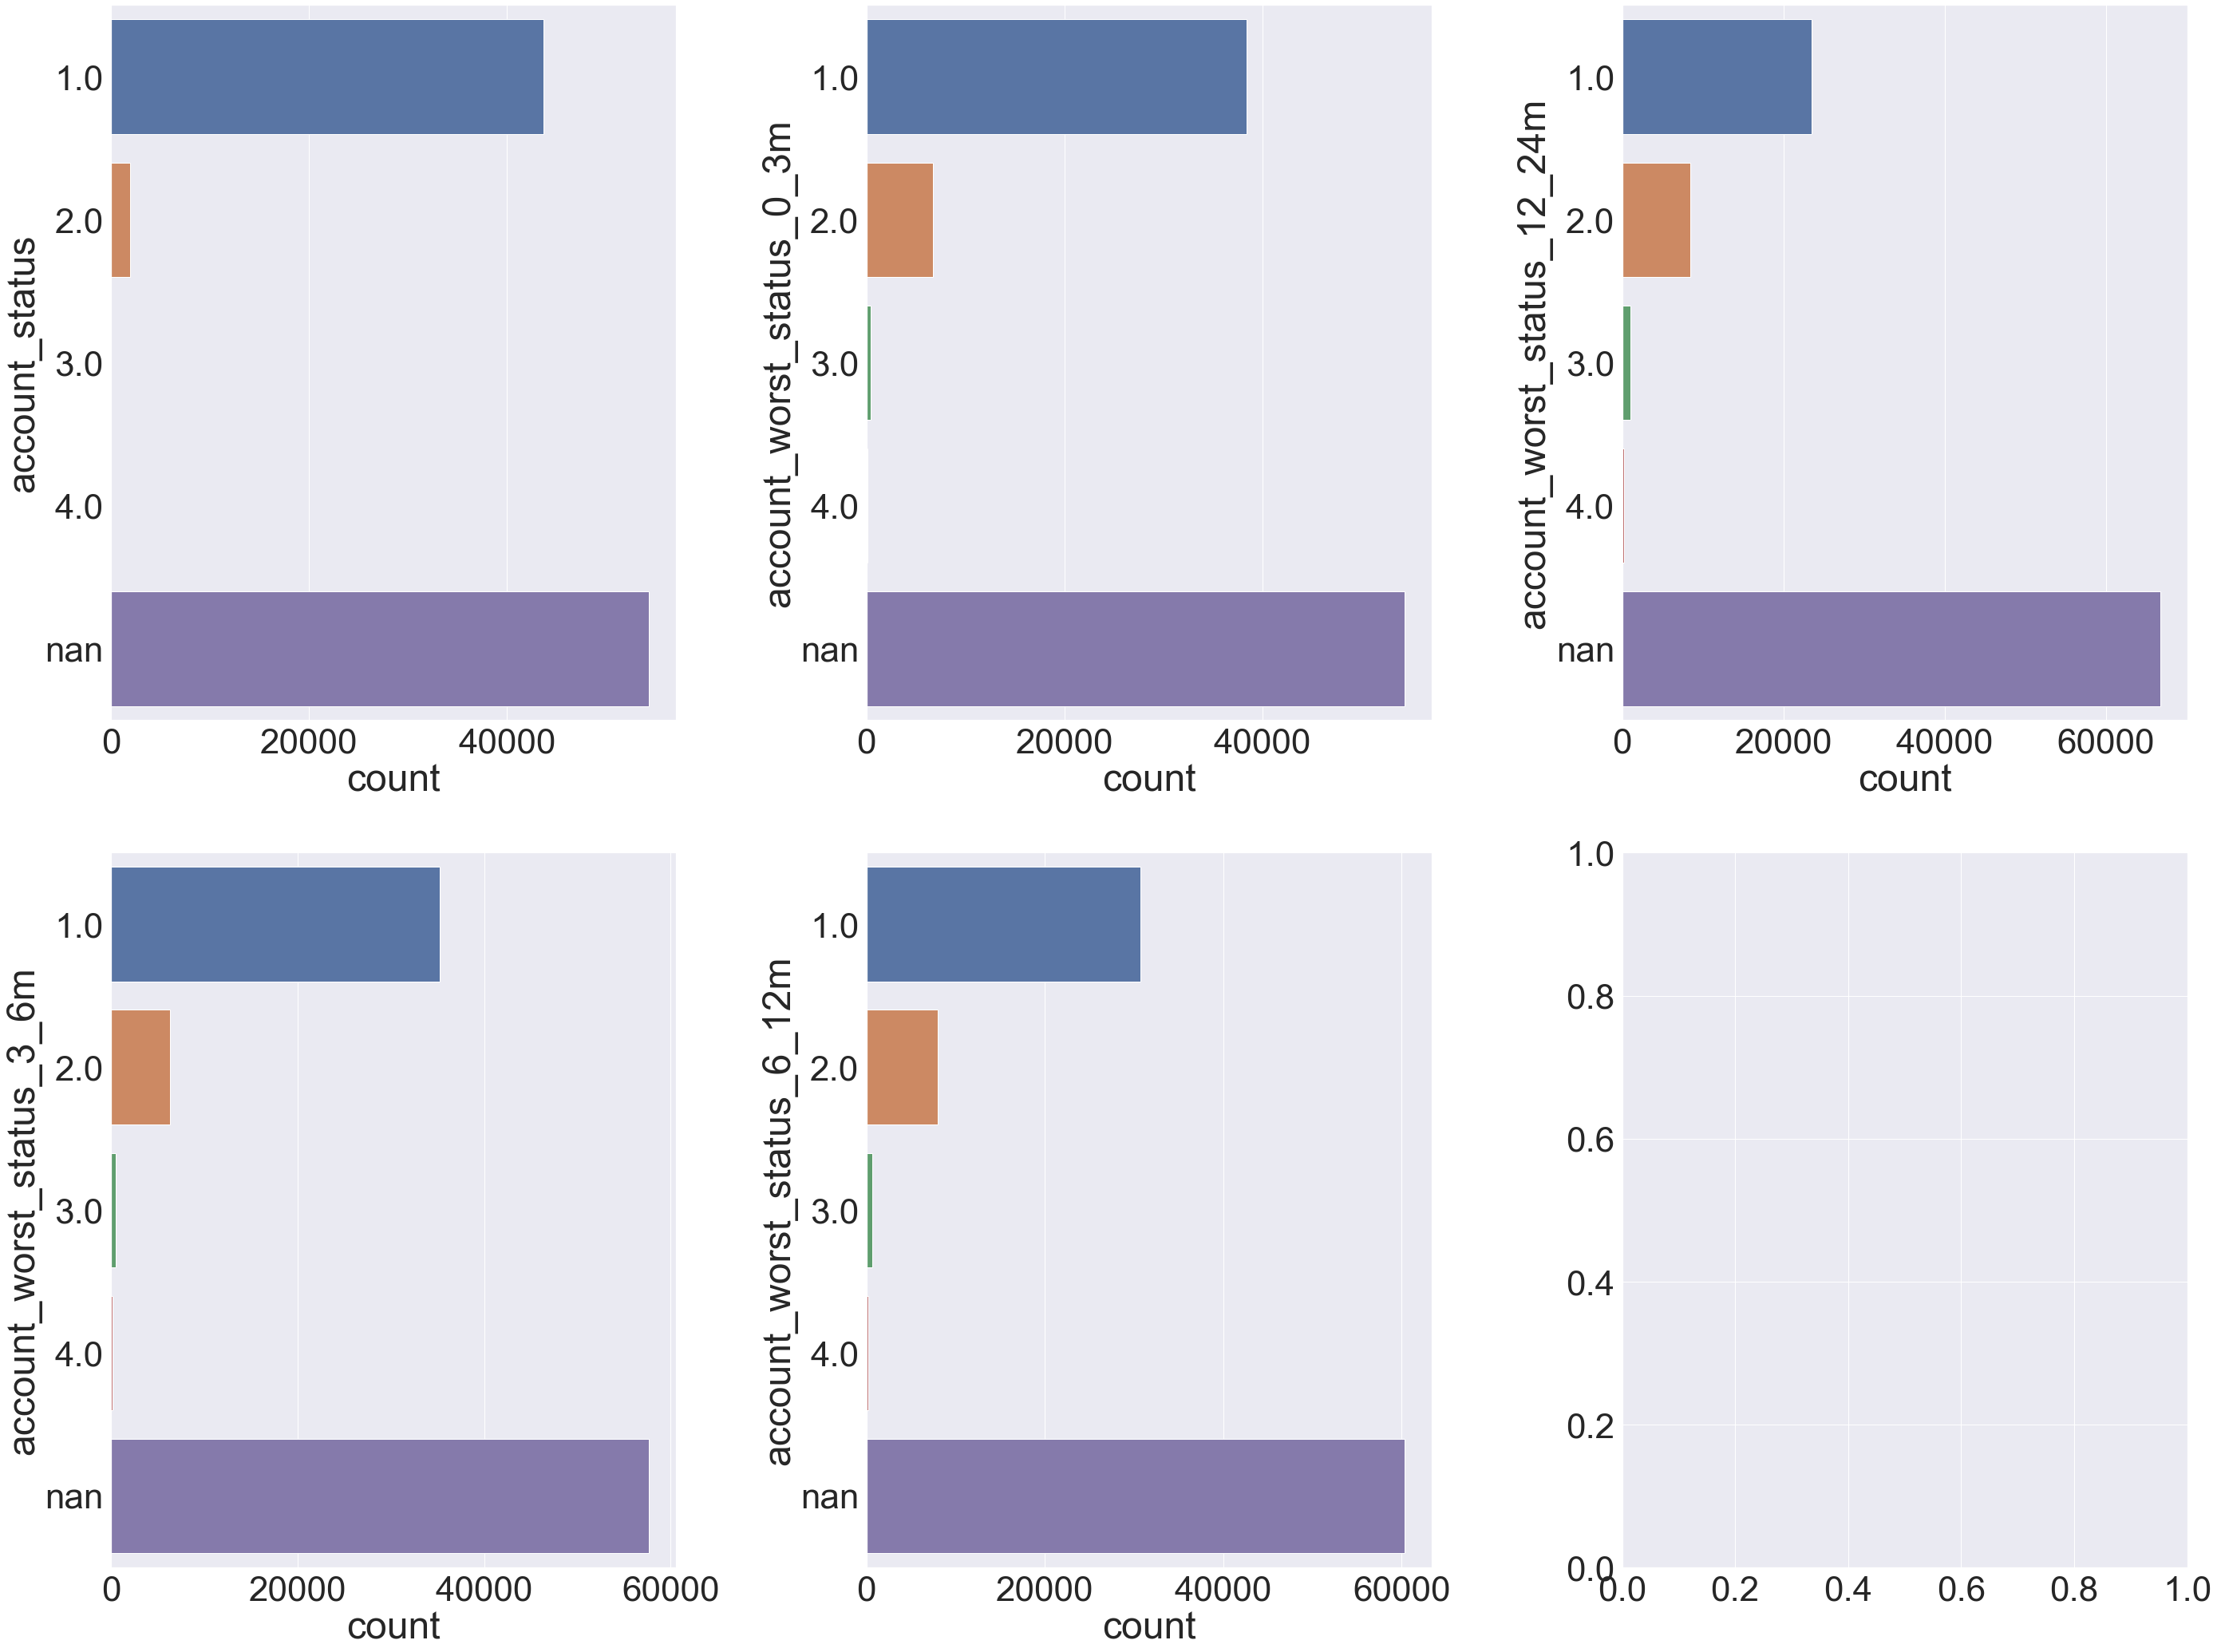

In [31]:
sns.set(font_scale=4)
fig, axes =plt.subplots(2,3, figsize=(40,30))
axes = axes.flatten()
for ax, catplot in zip(axes, cols1):
    sns.countplot(y=catplot, data=df, ax=ax, order = ['1.0', '2.0', '3.0', '4.0', 'nan'])
plt.tight_layout()  
plt.show()

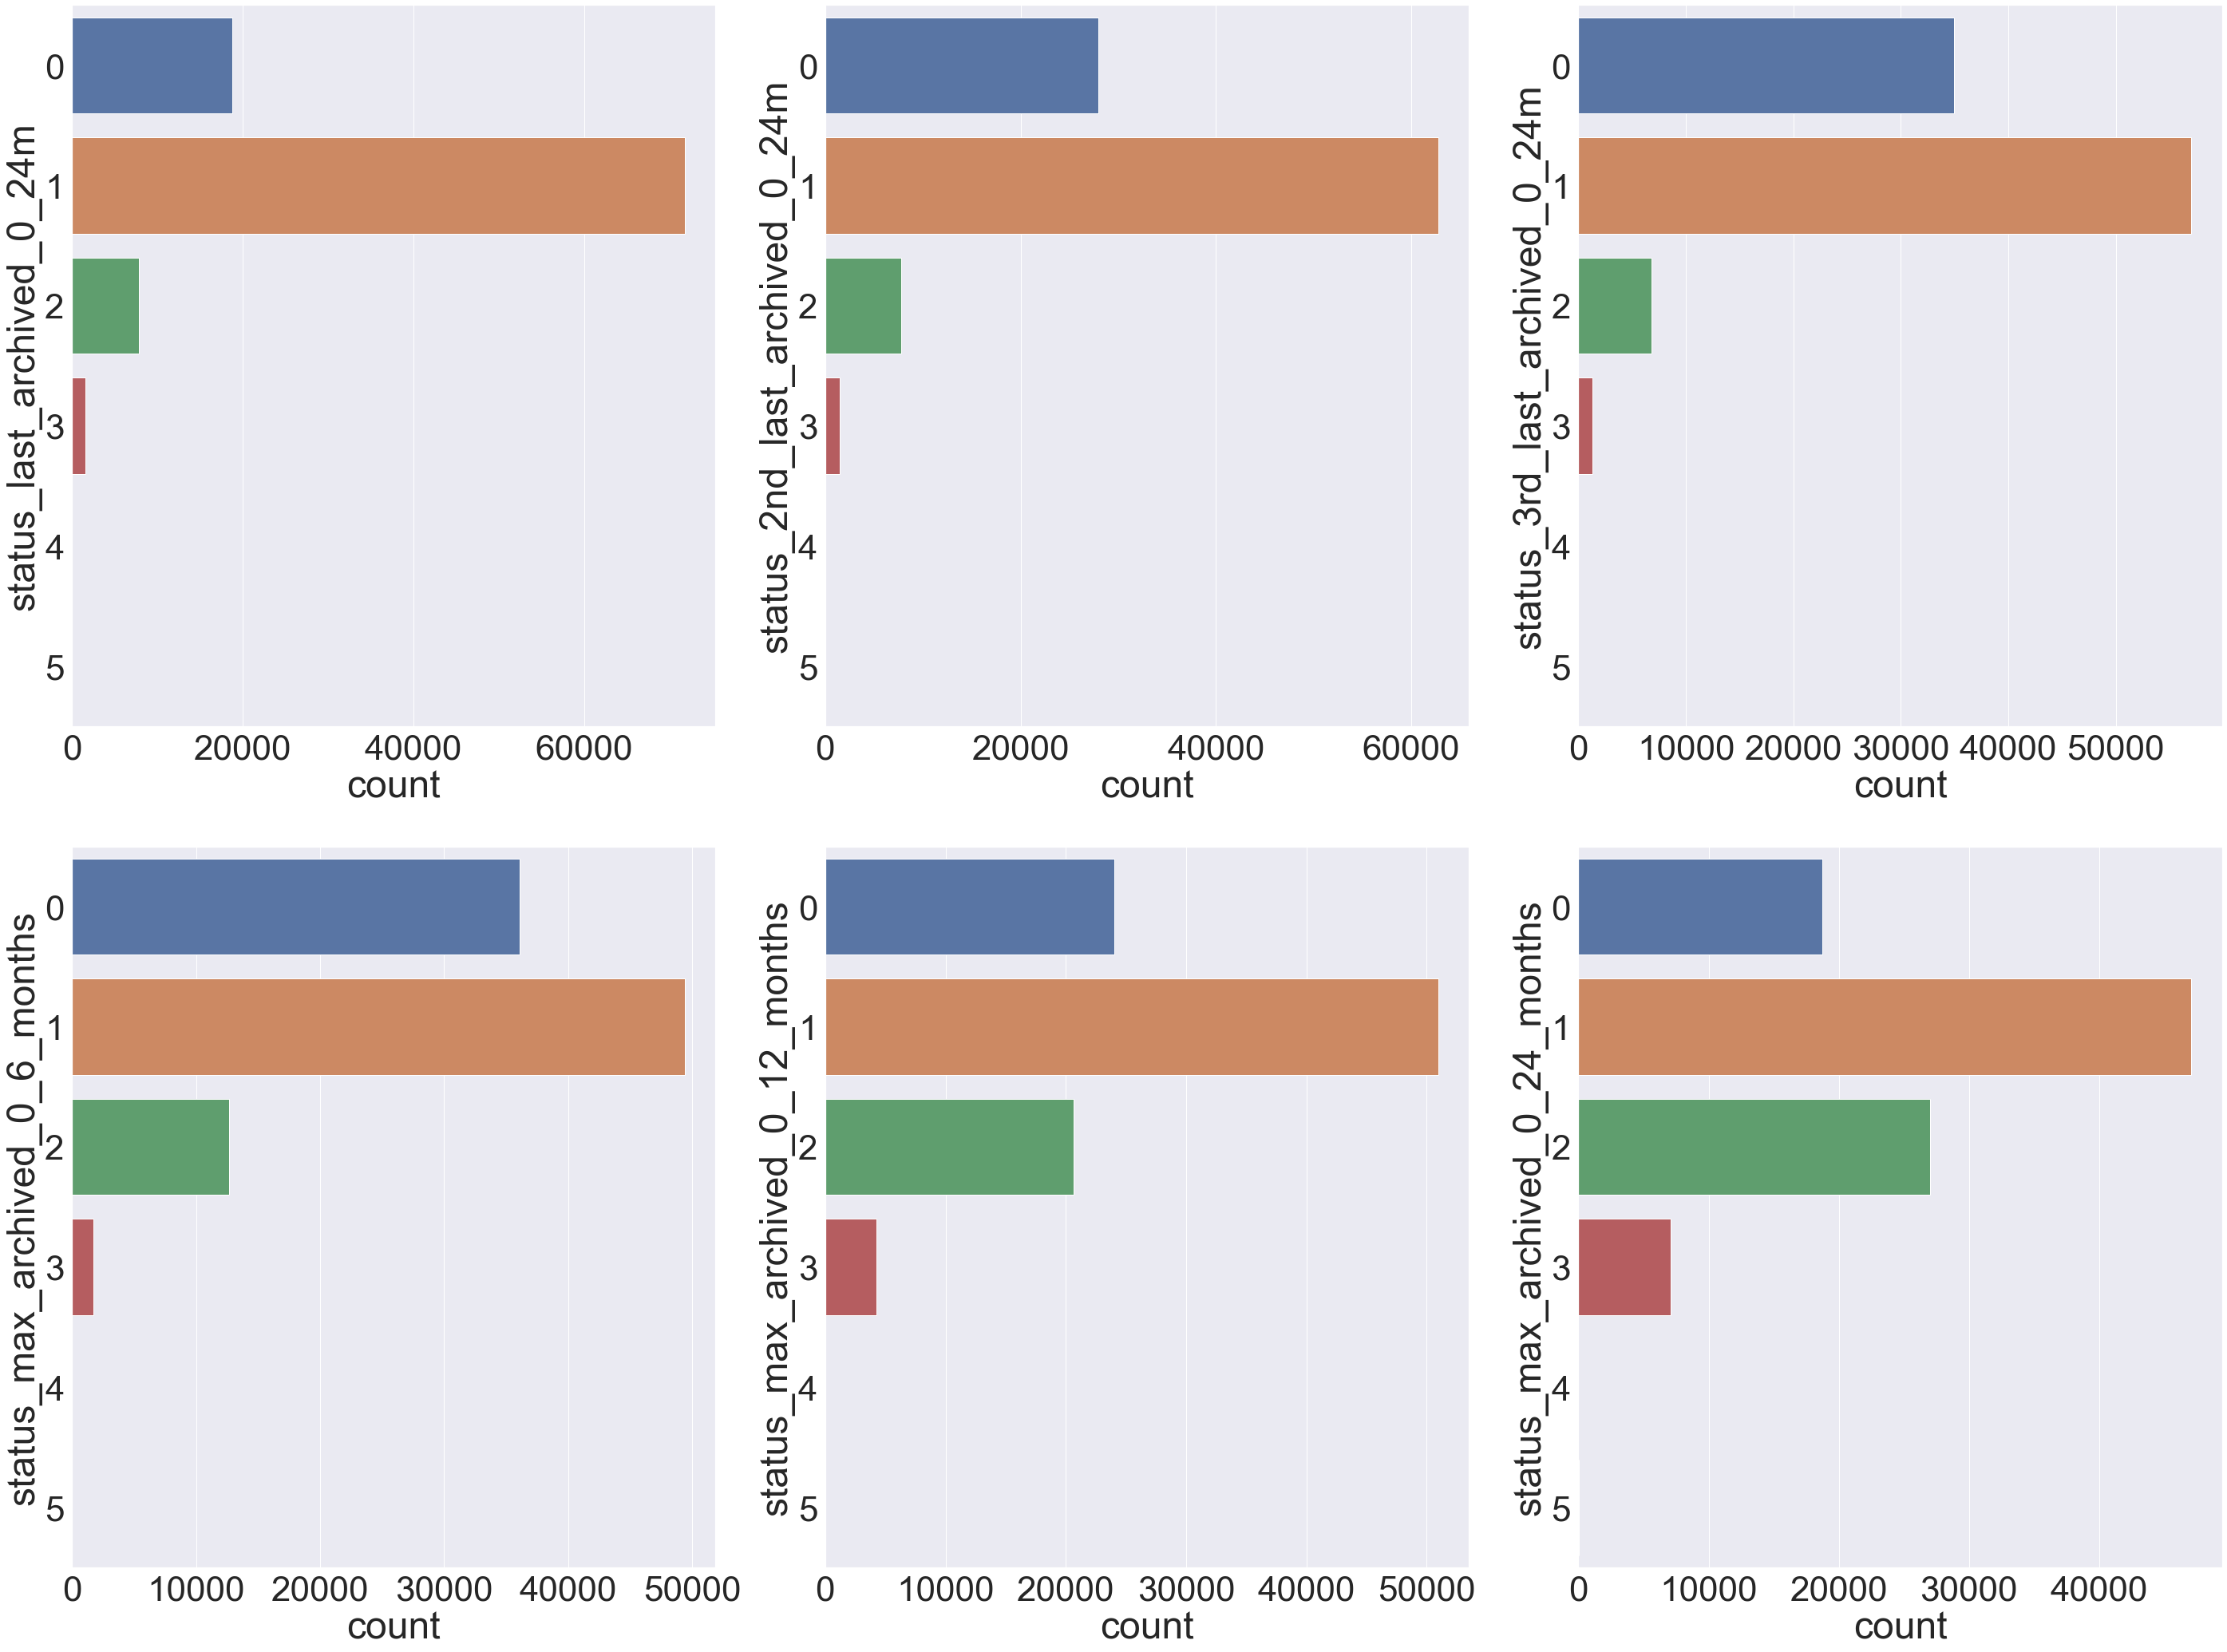

In [32]:
sns.set(font_scale=4)
fig, axes =plt.subplots(2,3, figsize=(40,30))
axes = axes.flatten()
#object_bol = df.dtypes == 'object'
for ax, catplot in zip(axes, cols2):
    sns.countplot(y=catplot, data=df, ax=ax, order = ['0','1', '2', '3', '4', '5'])
plt.tight_layout()  
plt.show()

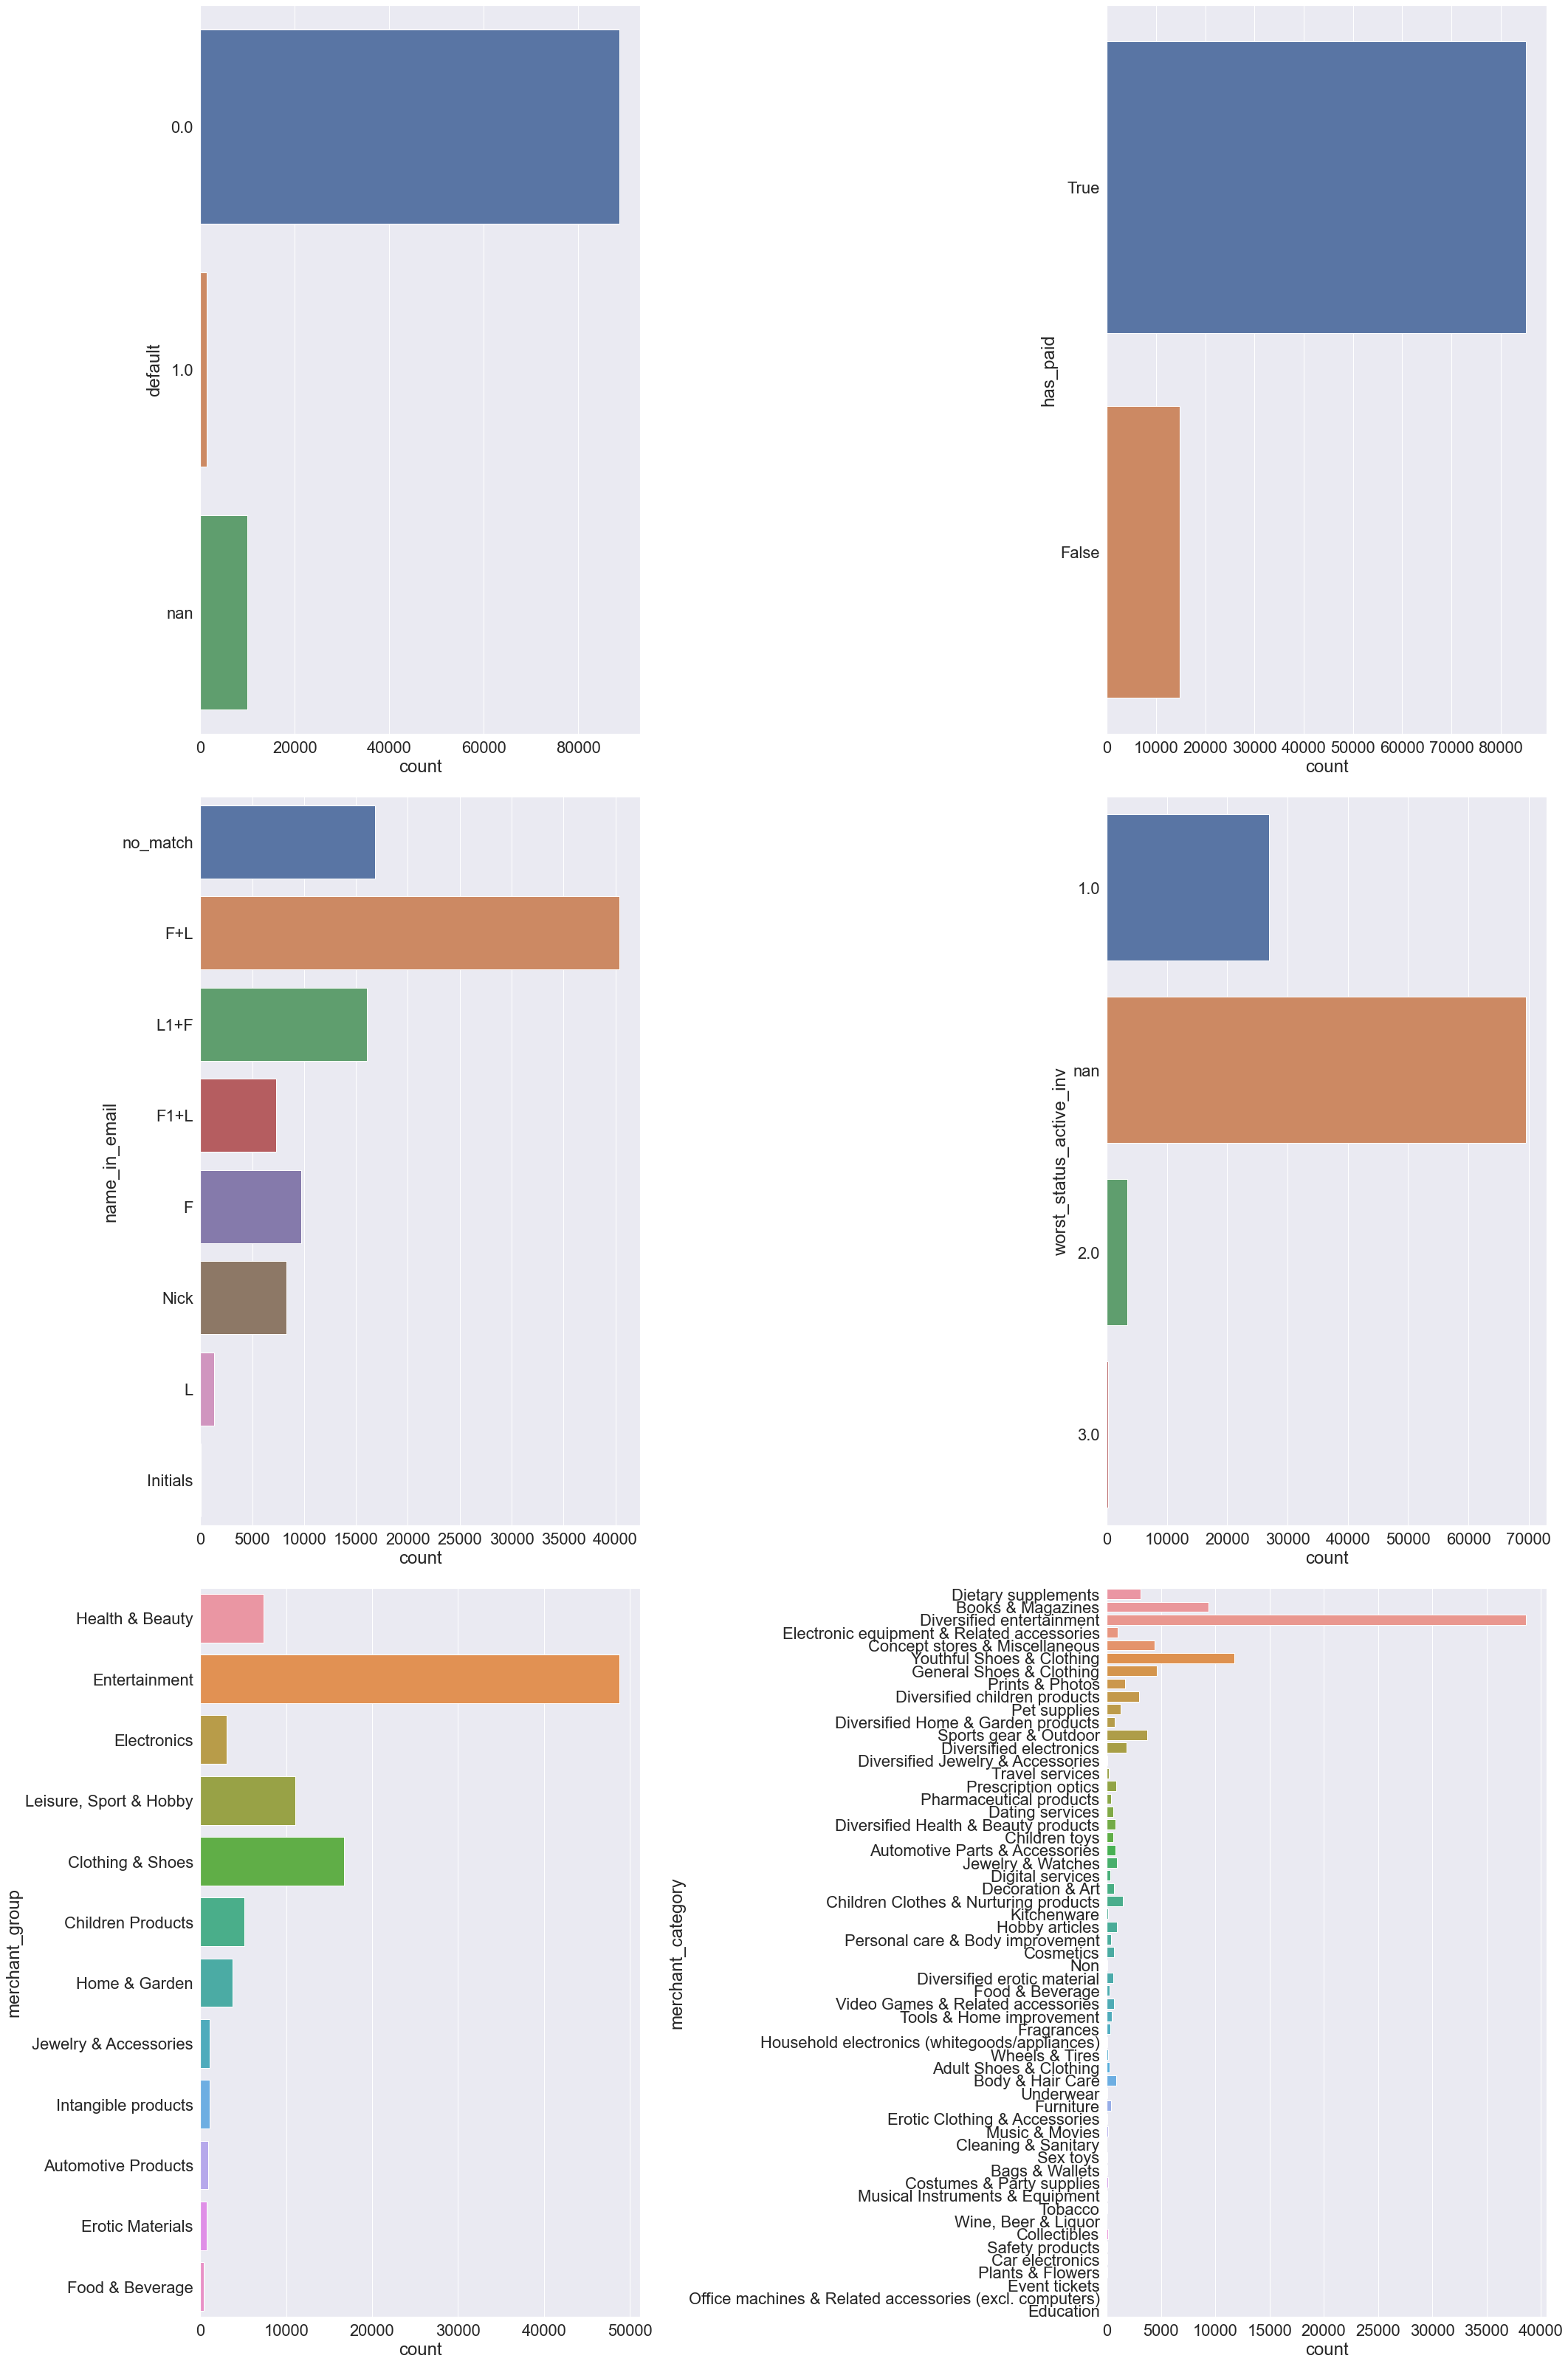

In [36]:
sns.set(font_scale=2)
fig, axes =plt.subplots(3,2, figsize=(30,45))
axes = axes.flatten()
#object_bol = df.dtypes == 'object'
for ax, catplot in zip(axes, cols3):
    sns.countplot(y=catplot, data=df, ax=ax)
plt.tight_layout()  
plt.show()

## Categorical - categorical : bar plot + Hue

In [30]:
df0 = df[df['default'] != 'nan']

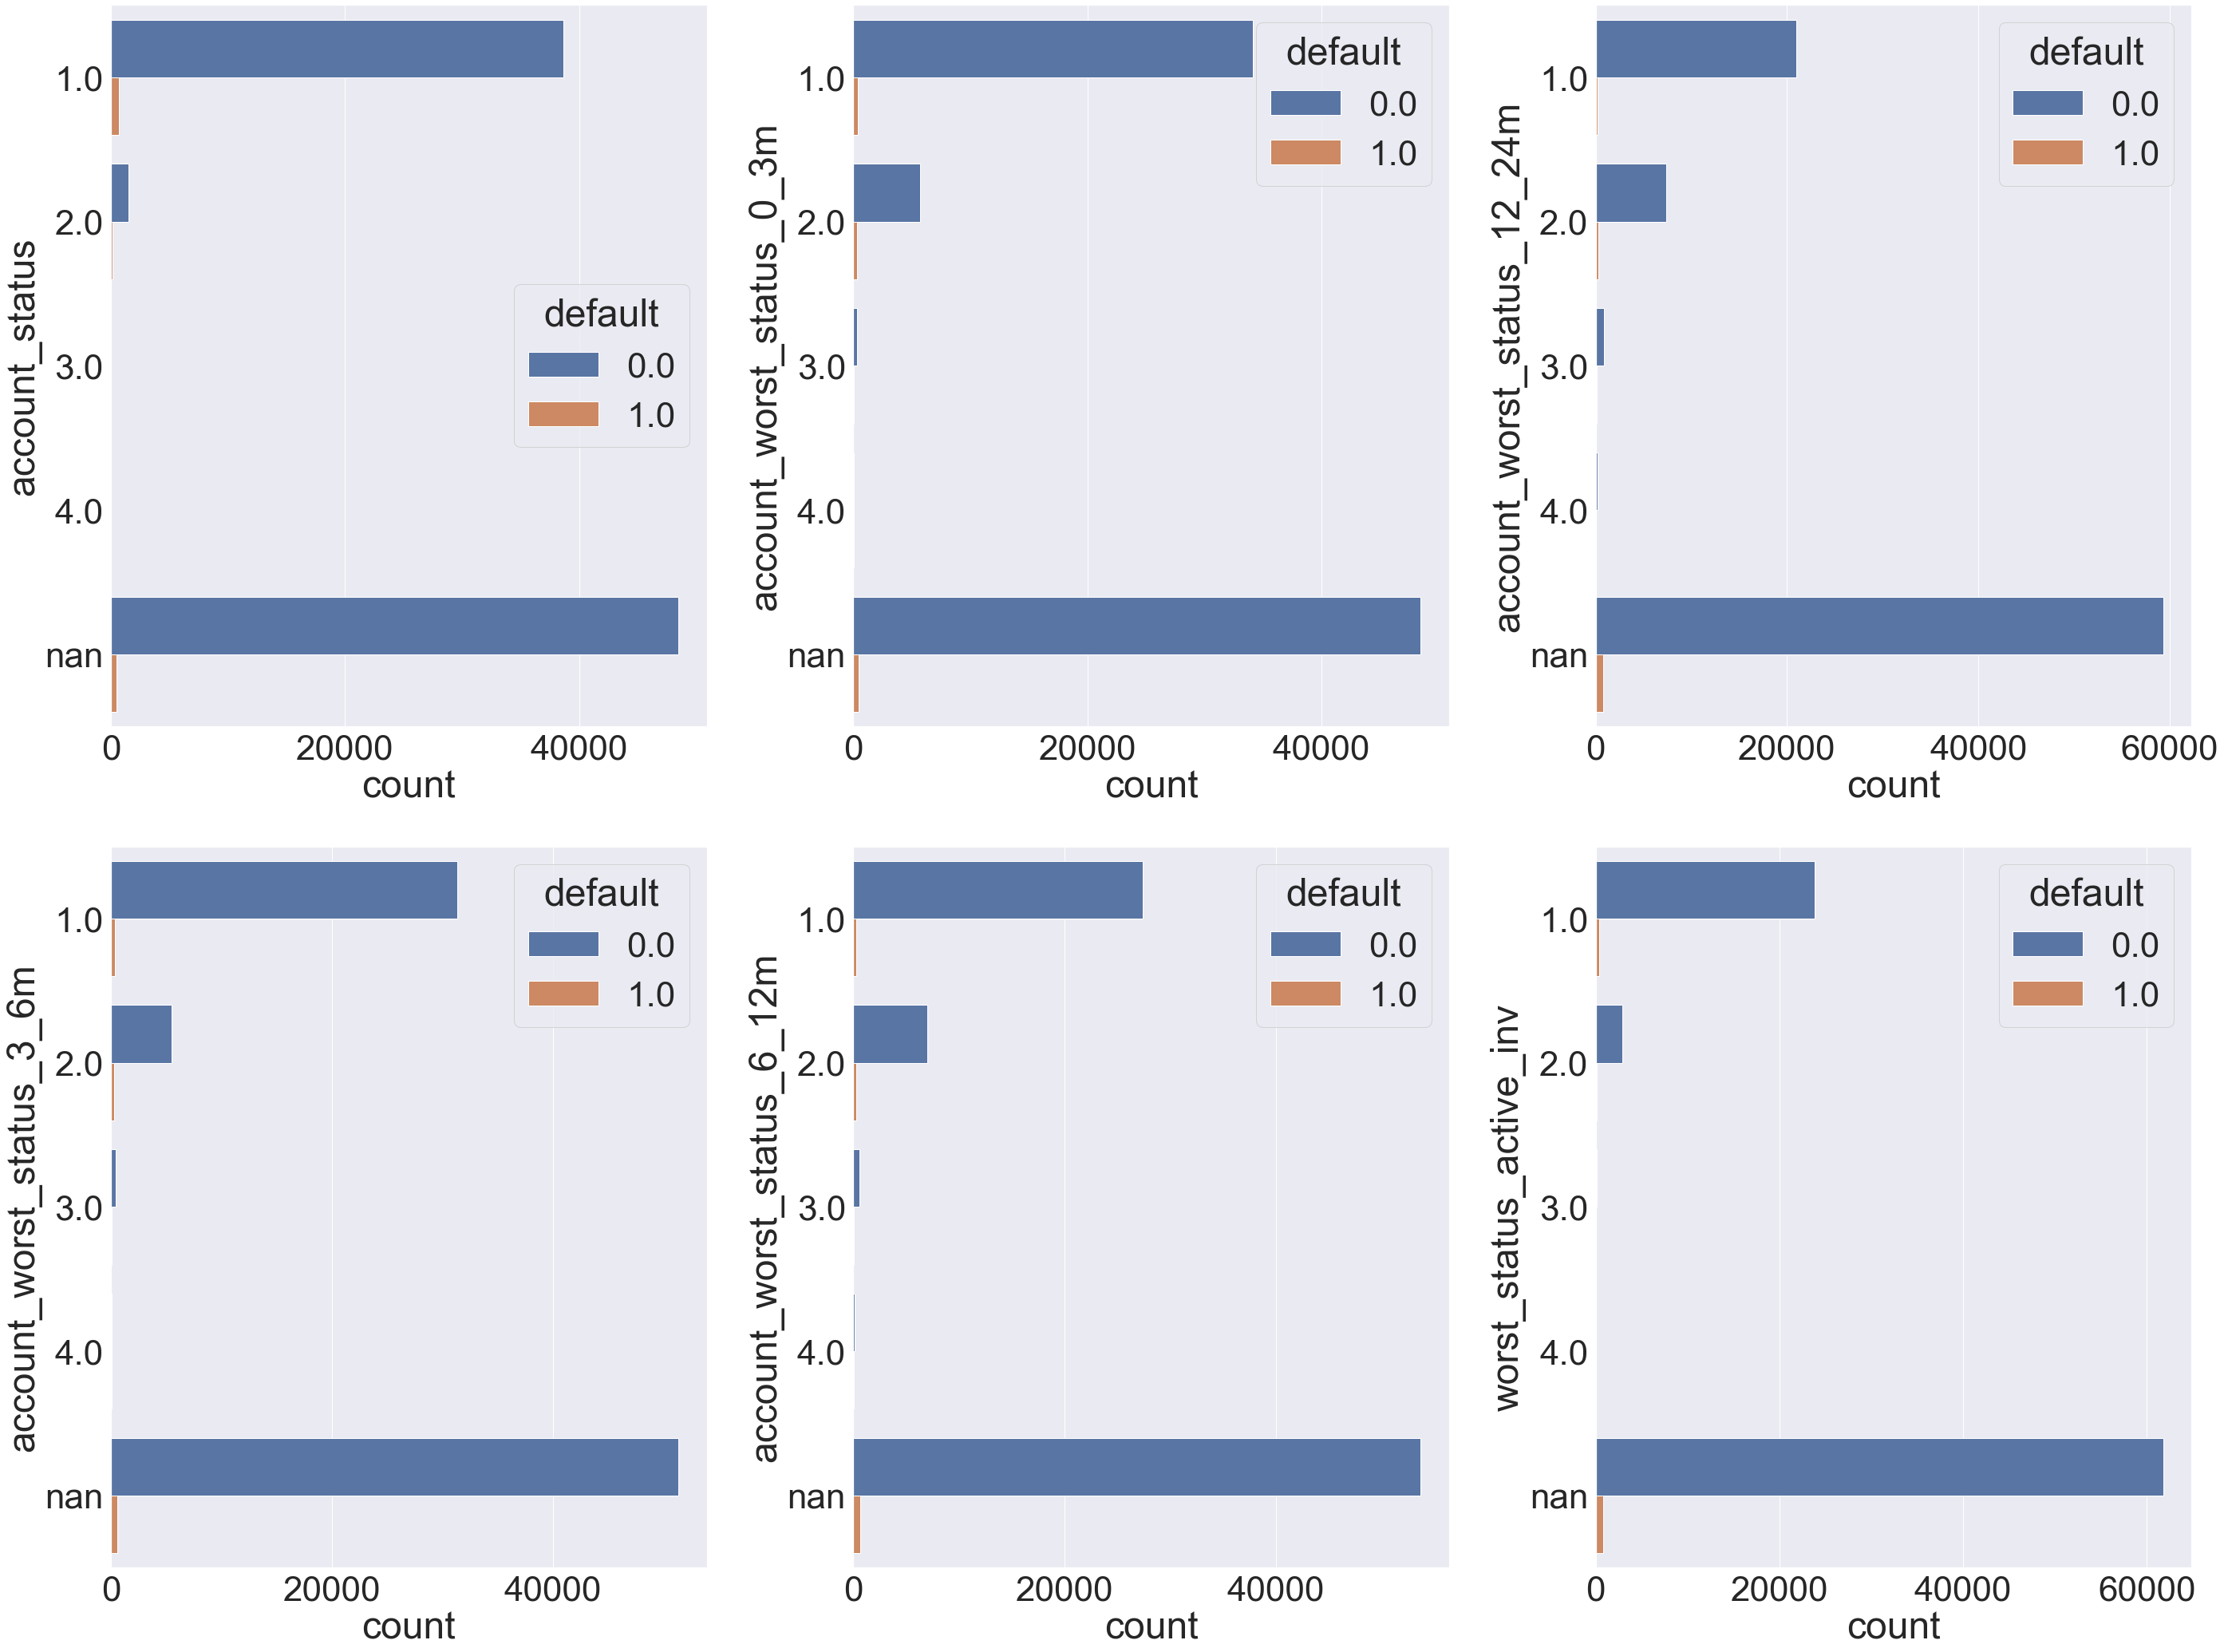

In [31]:
sns.set(font_scale=4)
fig, axes =plt.subplots(2,3, figsize=(40,30))
axes = axes.flatten()
#object_bol = df.dtypes == 'object'
for ax, catplot in zip(axes, cols1):
    sns.countplot(y=catplot, data=df0, ax=ax, order = ['1.0', '2.0', '3.0', '4.0', 'nan'],hue = 'default')
plt.tight_layout()  
plt.show()

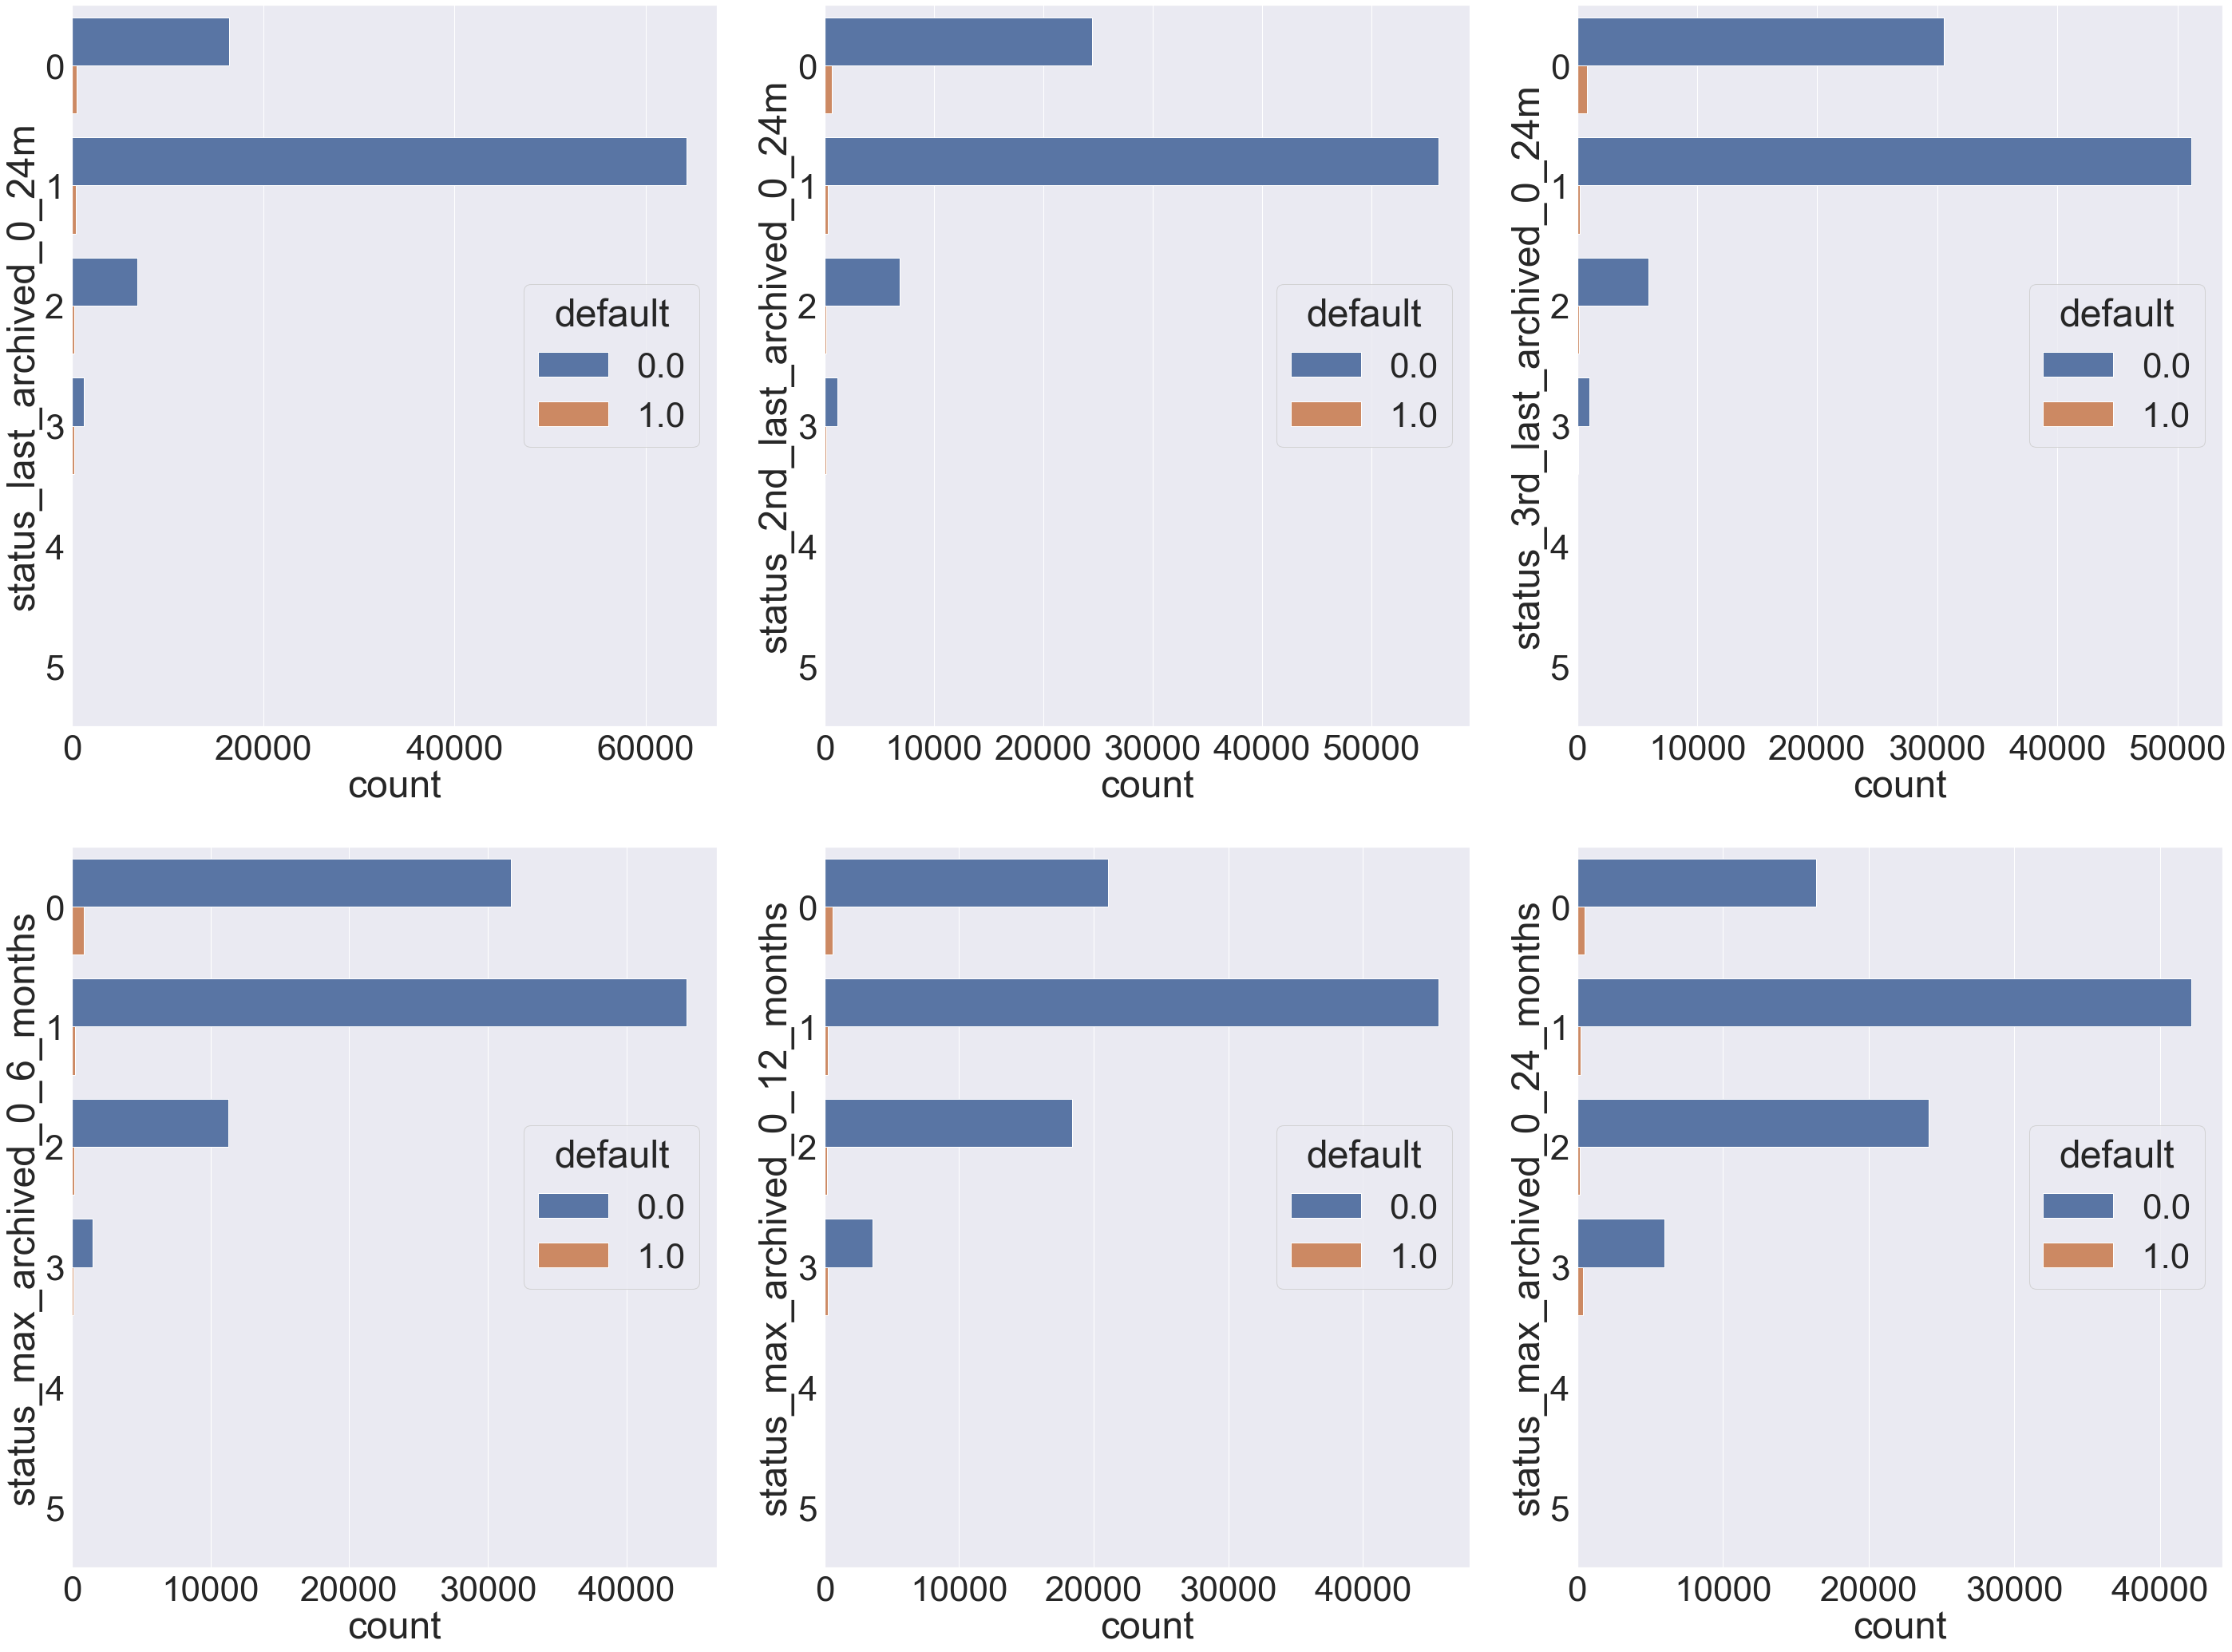

In [32]:
sns.set(font_scale=4)
fig, axes =plt.subplots(2,3, figsize=(40,30))
axes = axes.flatten()
for ax, catplot in zip(axes, cols2):
    sns.countplot(y=catplot, data=df0, ax=ax, order = ['0','1', '2', '3', '4', '5'],hue = 'default')
plt.tight_layout()  
plt.show()

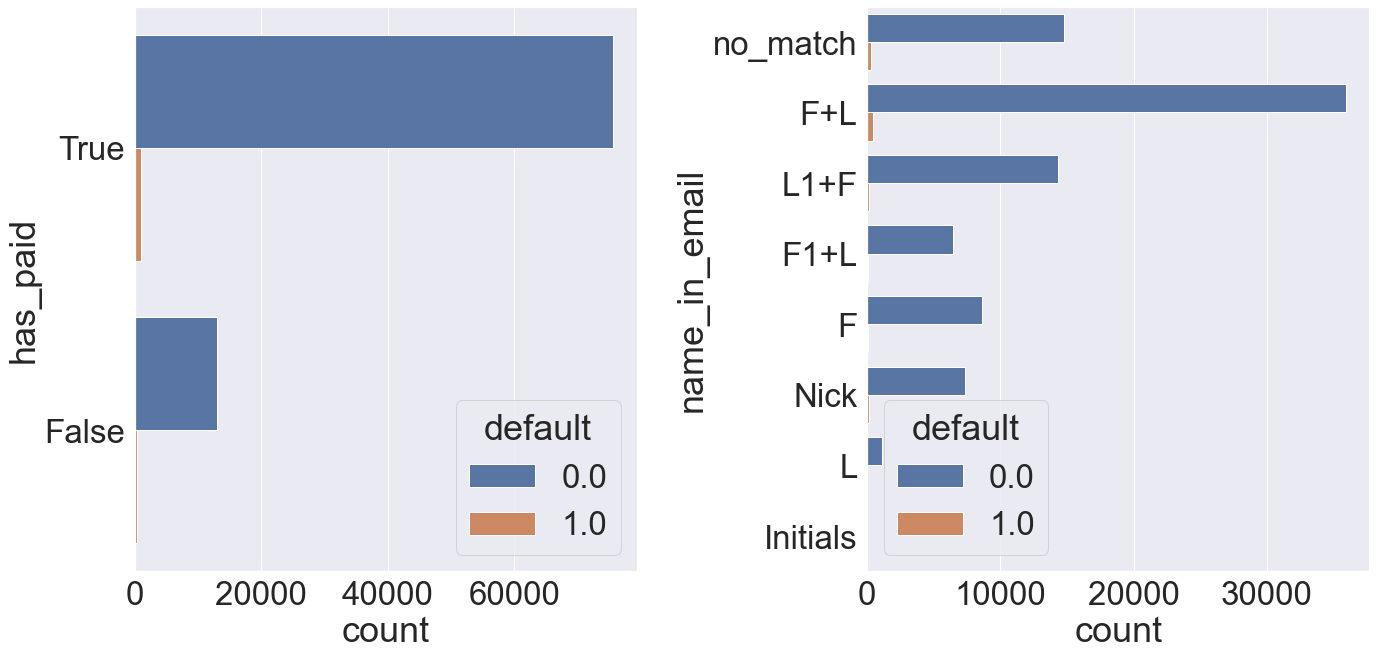

In [33]:
sns.set(font_scale=3)
fig, axes =plt.subplots(1,2, figsize=(20,10))
axes = axes.flatten()
#object_bol = df.dtypes == 'object'
for ax, catplot in zip(axes, cols3[1:3]):
    sns.countplot(y=catplot, data=df0, ax=ax, hue = 'default')
plt.tight_layout()  
plt.show()

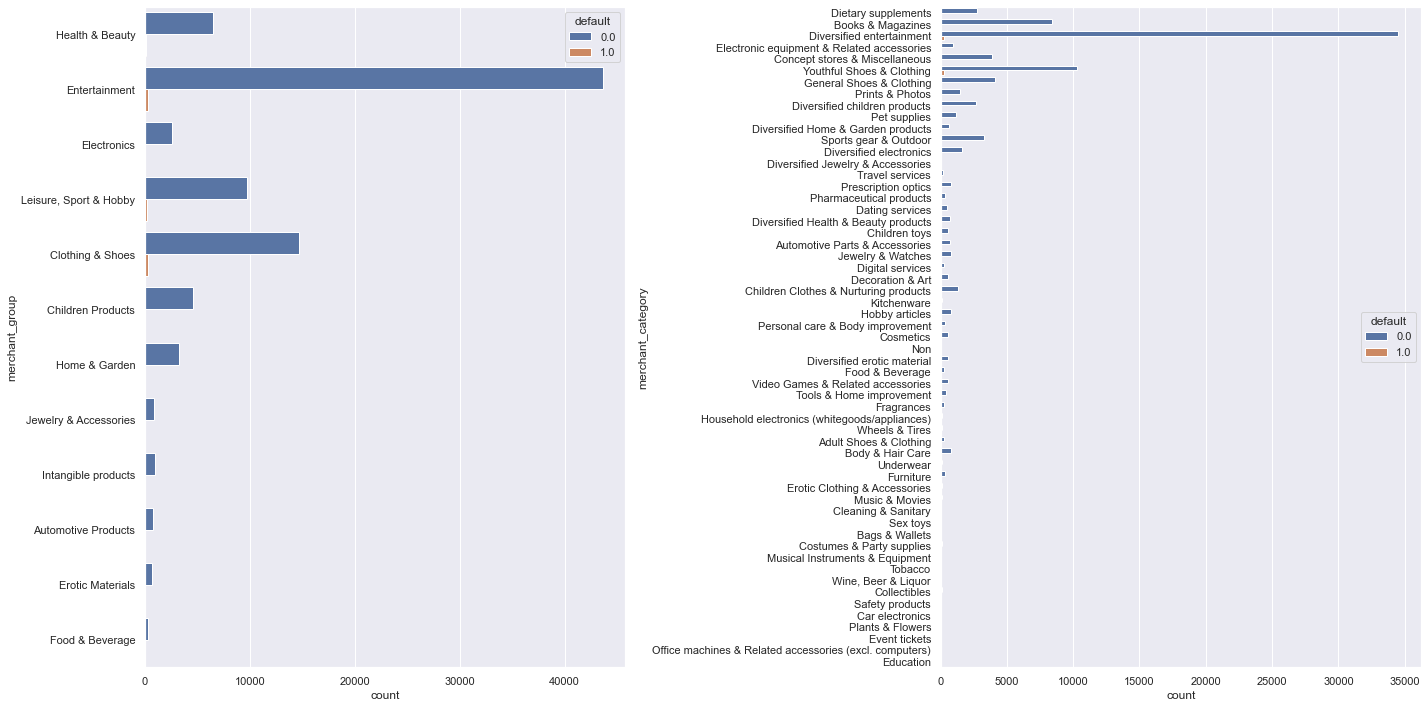

In [34]:
sns.set(font_scale=1)
fig, axes =plt.subplots(1,2, figsize=(20,10))
axes = axes.flatten()
#object_bol = df.dtypes == 'object'
for ax, catplot in zip(axes, cols3[4:]):
    sns.countplot(y=catplot, data=df0, ax=ax, hue = 'default')
plt.tight_layout()  
plt.show()

## Numerical Features - Histogram

In [36]:
num5 = ['age', 'time_hours','avg_payment_span_0_12m', 'avg_payment_span_0_3m', 'account_incoming_debt_vs_paid_0_24m','account_days_in_dc_12_24m', 'account_days_in_rem_12_24m', 'account_days_in_term_12_24m']
num7 = ['num_active_div_by_paid_inv_0_12m', 'num_active_inv', 'num_arch_dc_0_12m', 'num_arch_dc_12_24m', 'num_arch_ok_0_12m', 'num_arch_ok_12_24m', 'num_arch_rem_0_12m', 'num_arch_written_off_0_12m', 'num_arch_written_off_12_24m', 'num_unpaid_bills']
num8 = ['recovery_debt', 'sum_capital_paid_account_0_12m', 'sum_capital_paid_account_12_24m', 'sum_paid_inv_0_12m','account_amount_added_12_24m','max_paid_inv_0_12m', 'max_paid_inv_0_24m']


In [ ]:
# def plot_multiple_histogram(df, cols):
#     fig, axs = plt.subplots(2, 2, figsize=(7, 7))
#     for c in cols:
#         for i, j in 
    # fig, axs = plt.subplots(2, 2, figsize=(7, 7))
# sns.histplot(data=df, x="sepal_length", kde=True, color="skyblue", ax=axs[0, 0])
# sns.histplot(data=df, x="sepal_width", kde=True, color="olive", ax=axs[0, 1])
# sns.histplot(data=df, x="petal_length", kde=True, color="gold", ax=axs[1, 0])
# sns.histplot(data=df, x="petal_width", kde=True, color="teal", ax=axs[1, 1])
# plt.show()

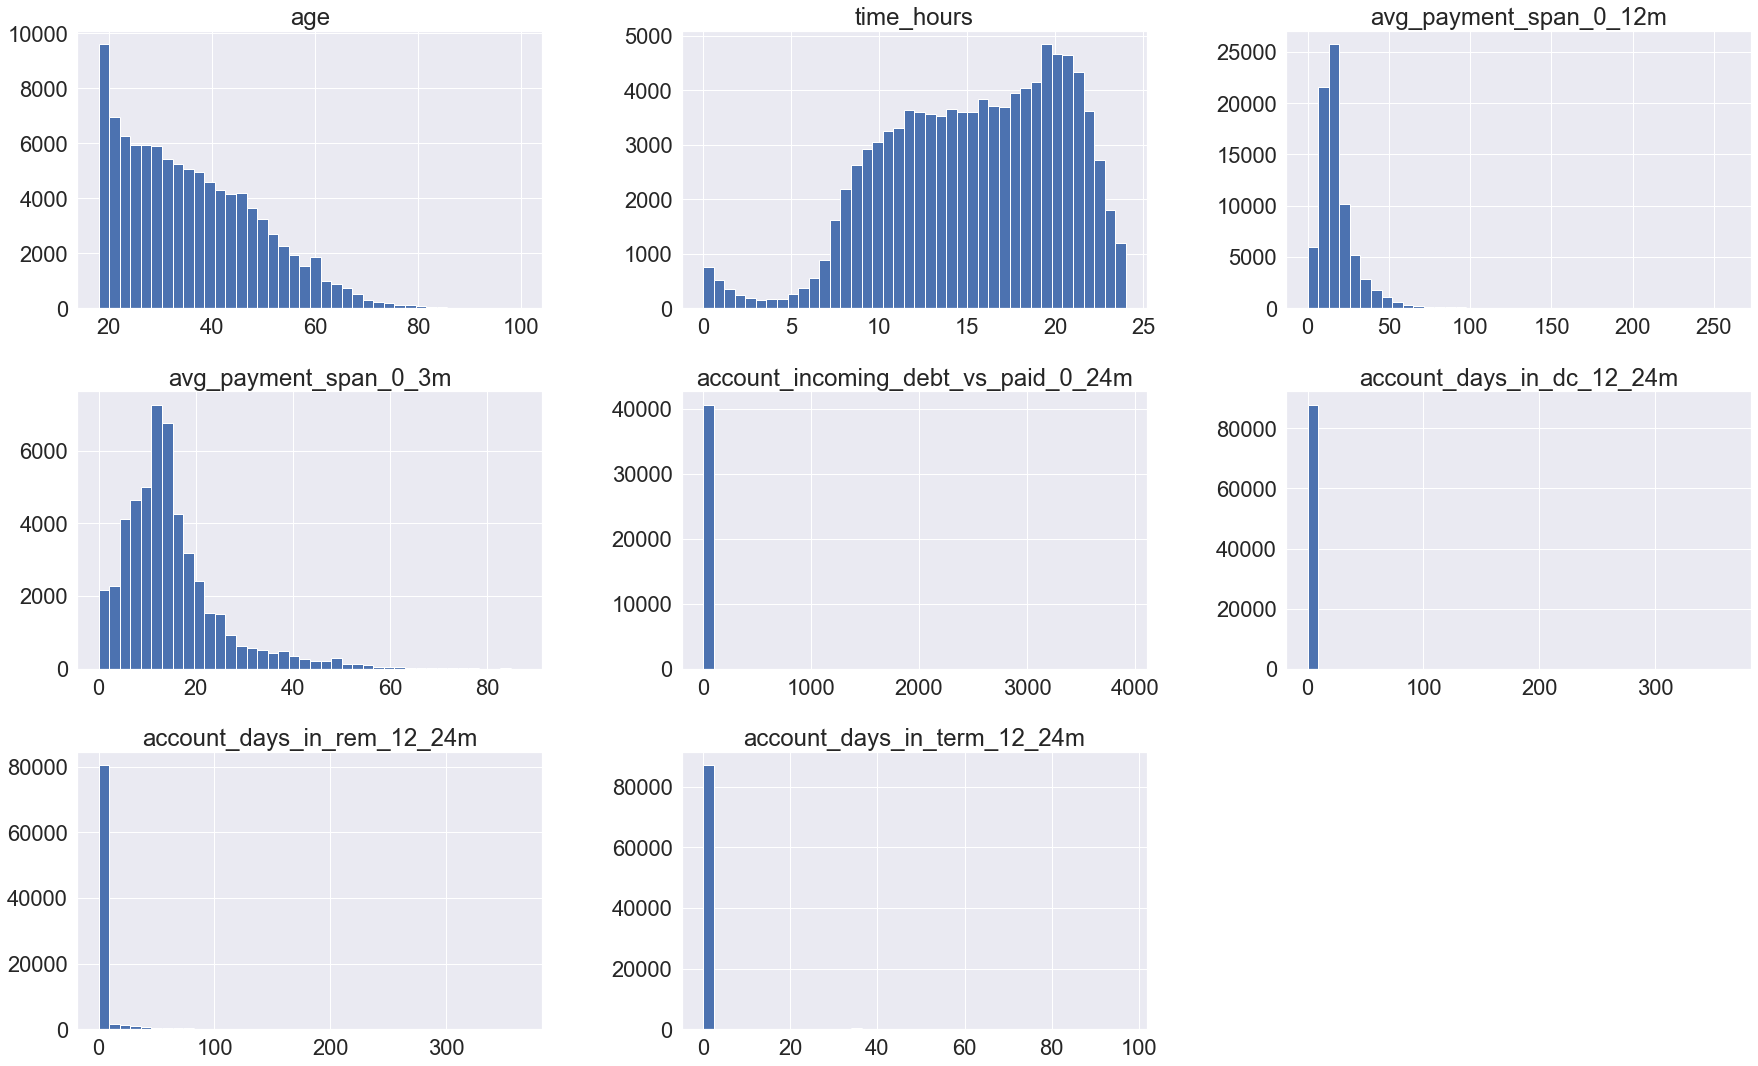

In [142]:
df[num5].hist(bins=40, figsize=(30,25), layout=(4,3));

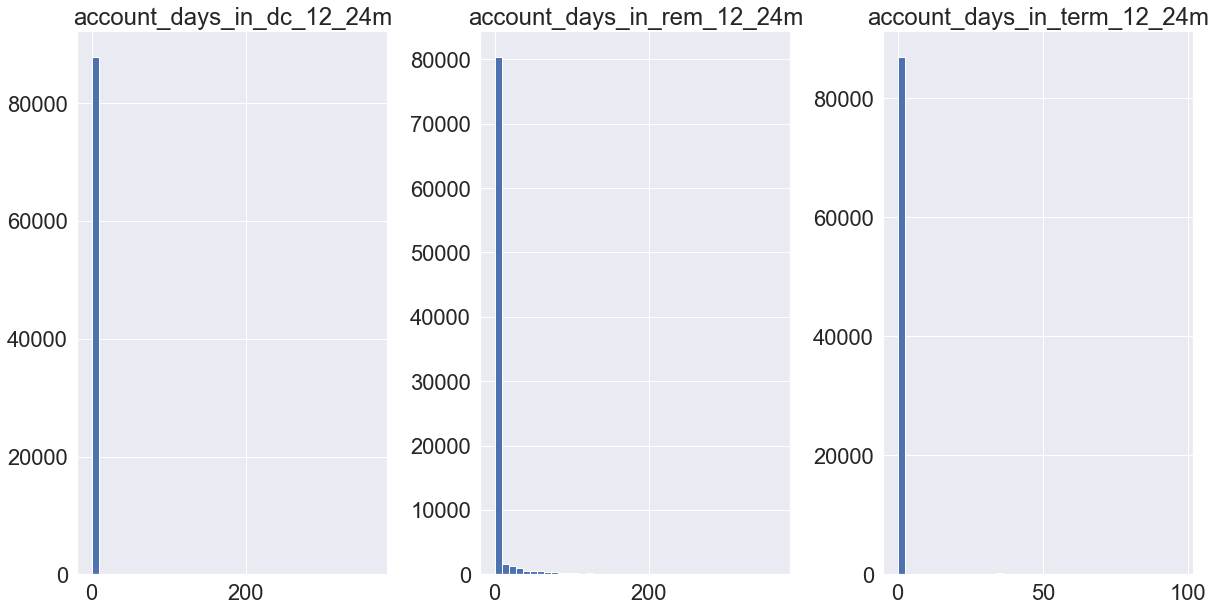

In [153]:
df[num2].hist(bins=40, figsize=(20,10), layout=(1,3));

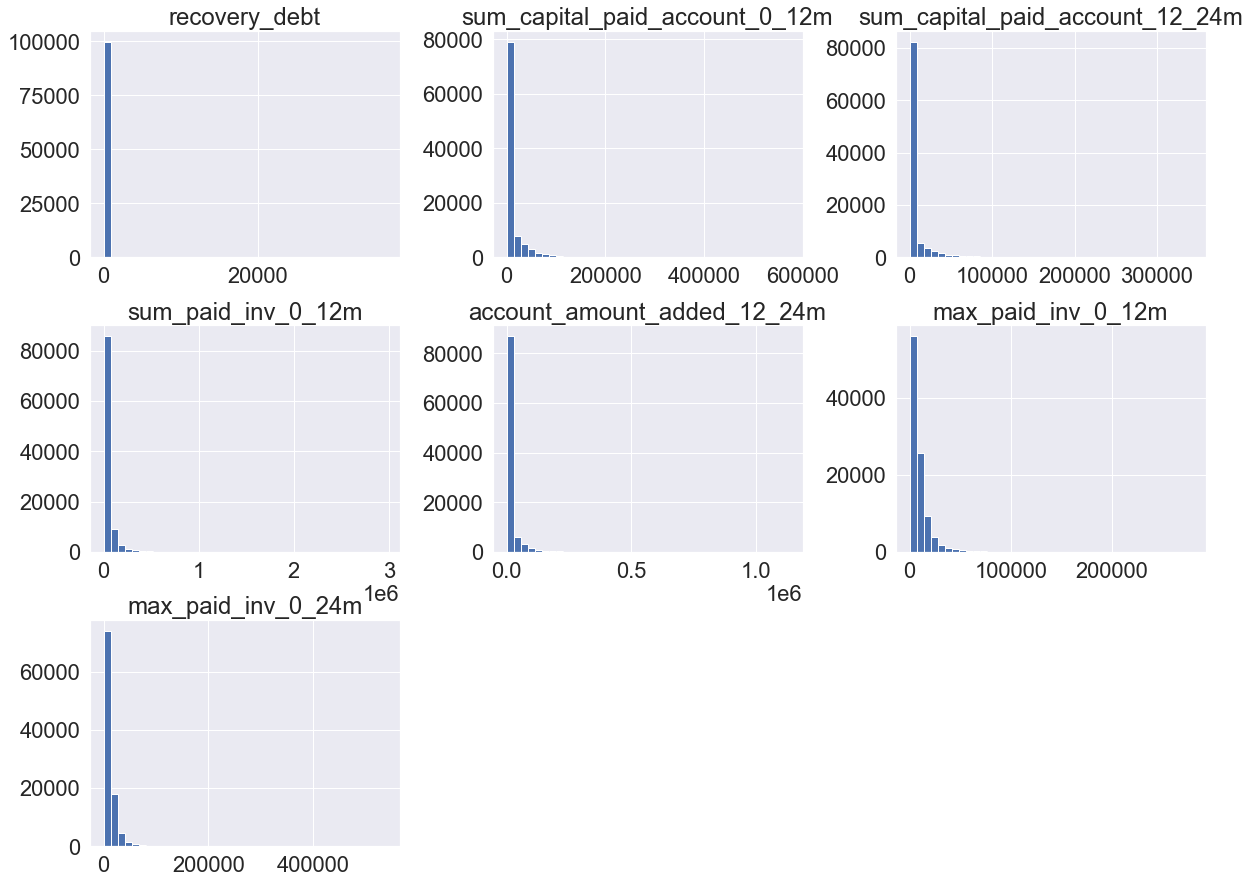

In [136]:
df[num8].hist(bins=40, figsize=(20,15), layout=(3,3));

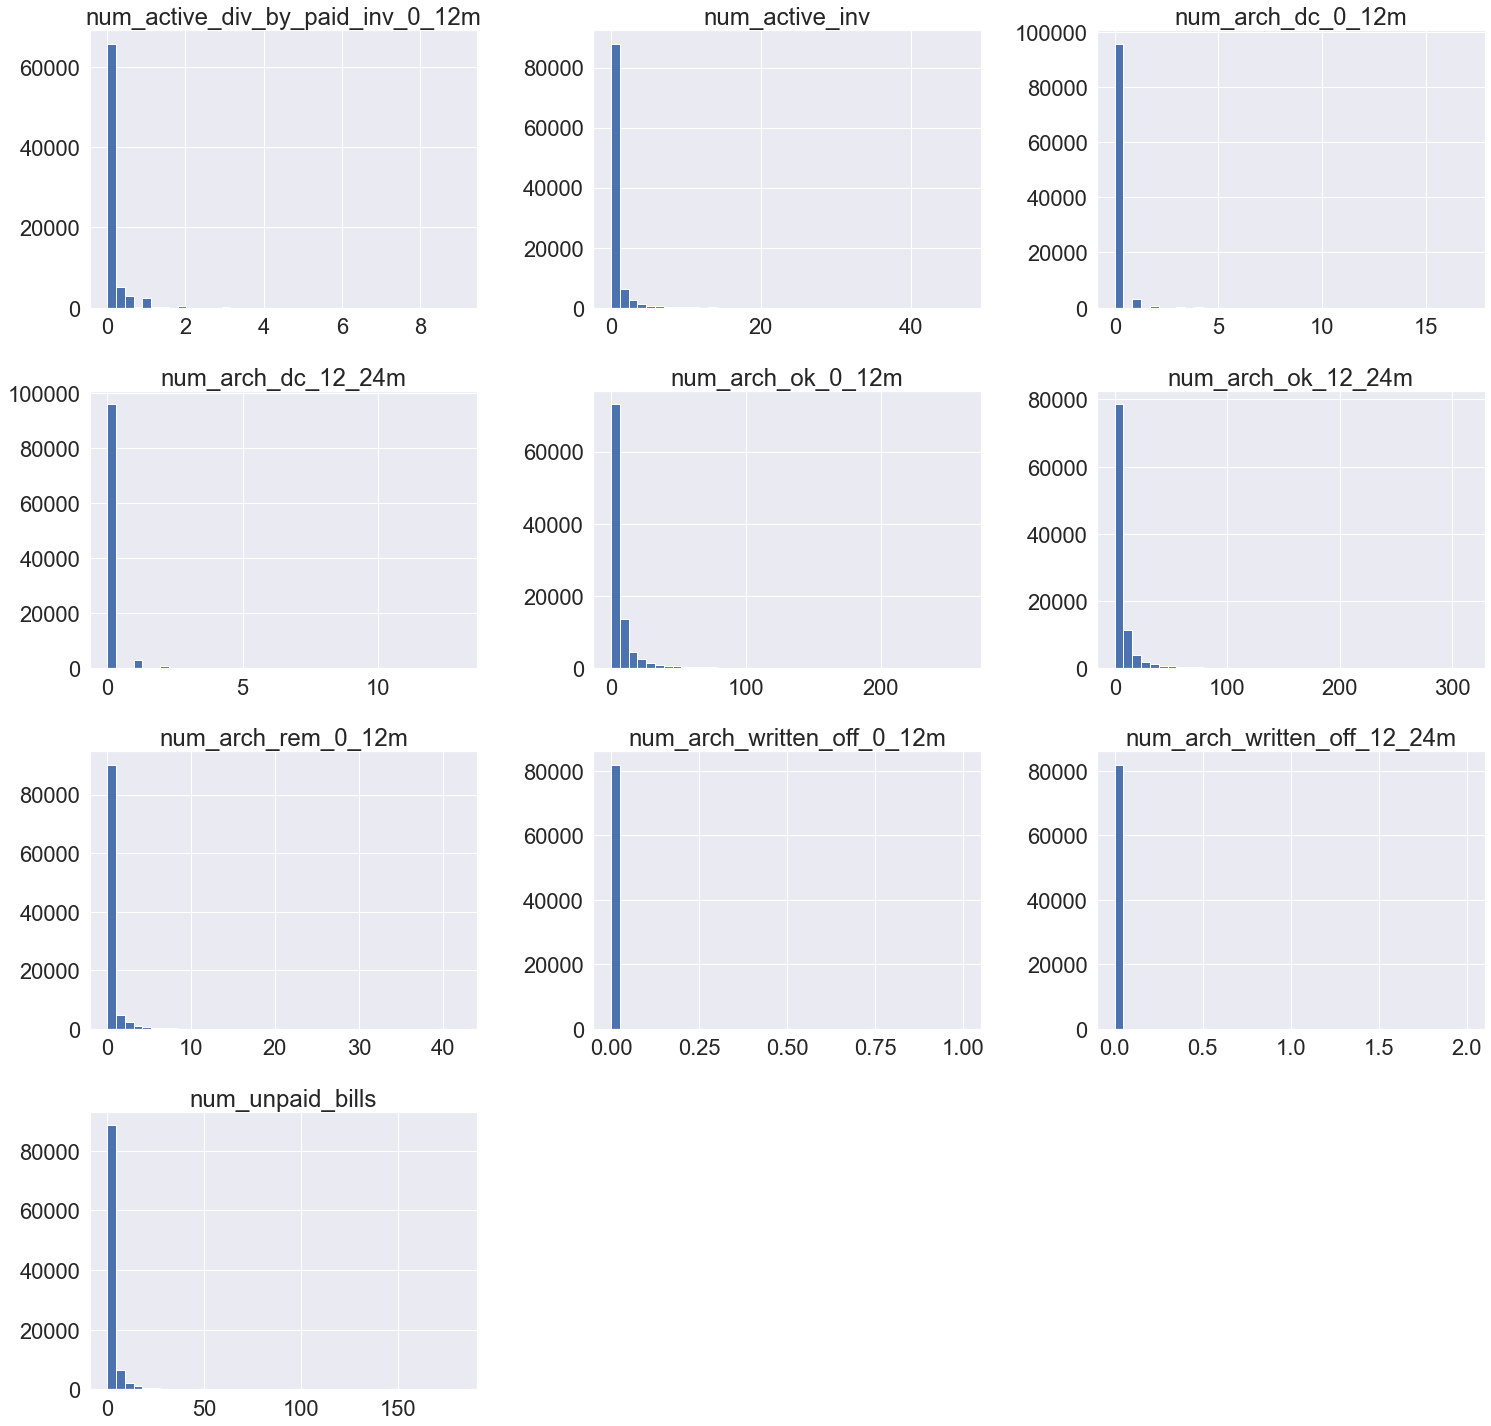

In [116]:
df[num7].hist(bins=40, figsize=(25,25), layout=(4,3));

In [37]:
#https://towardsdatascience.com/how-to-use-python-seaborn-for-exploratory-data-analysis-1a4850f48f14

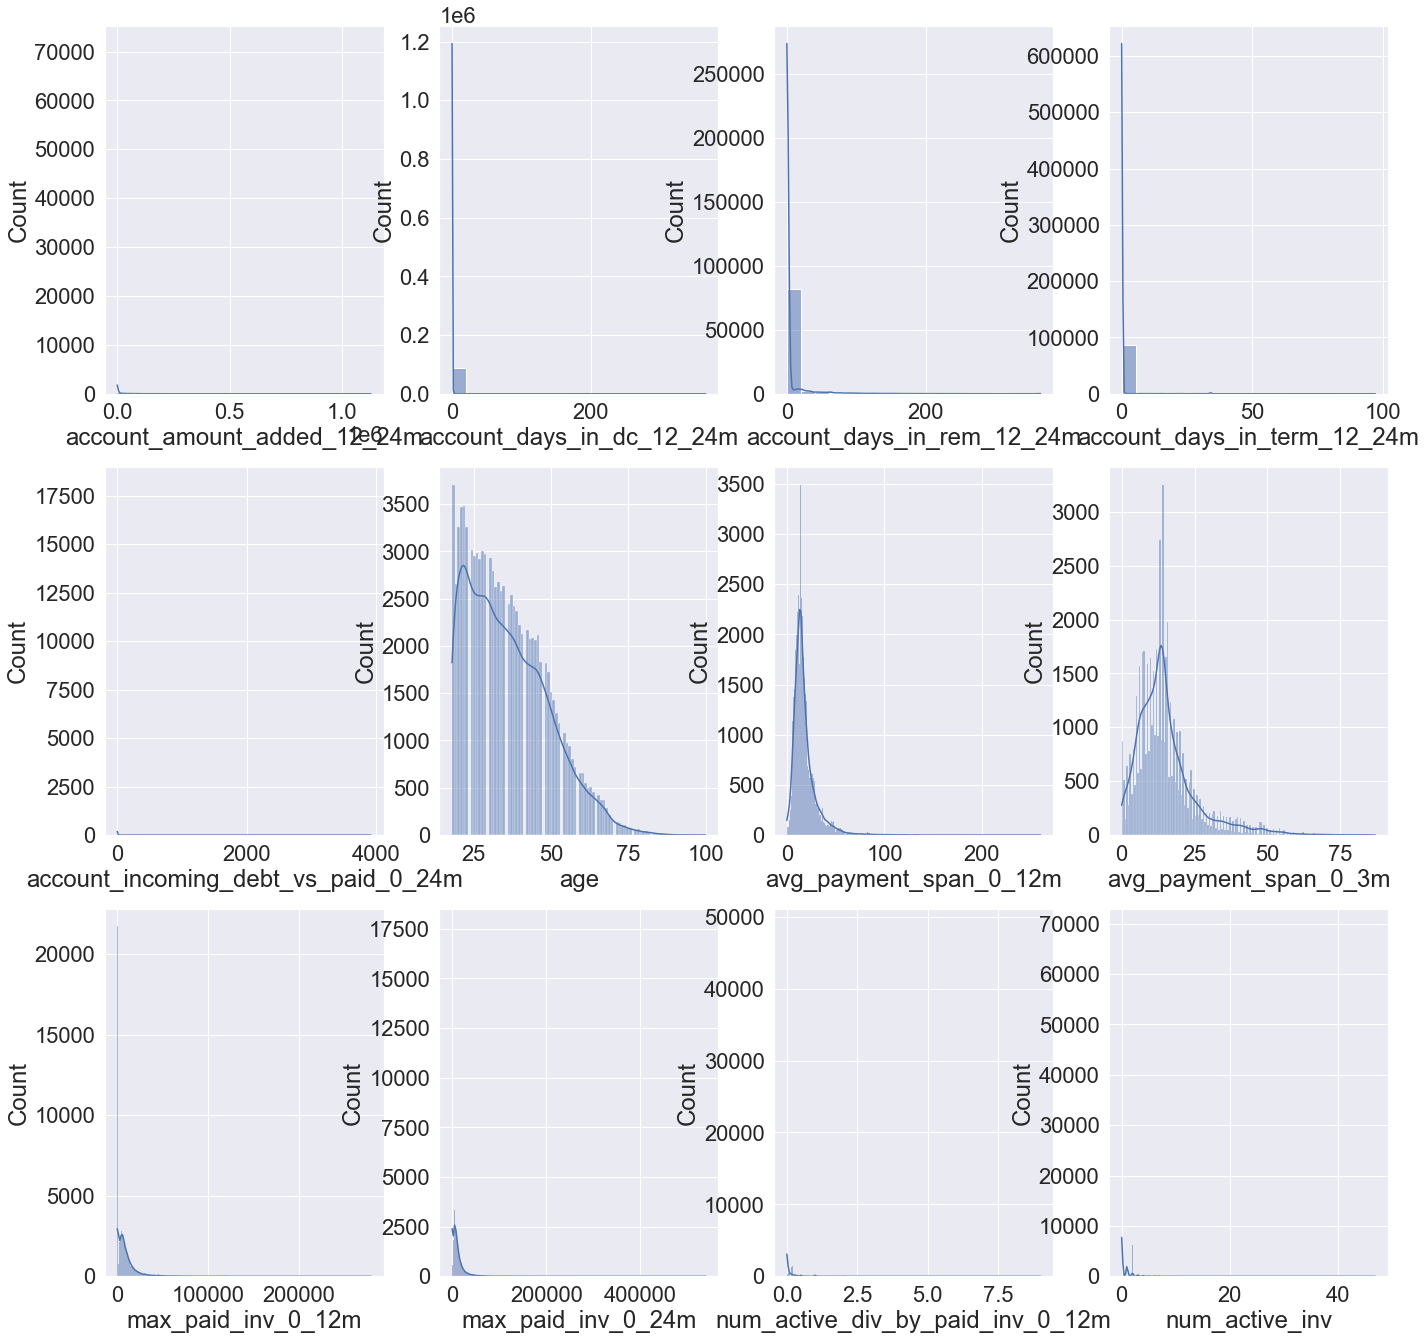

In [137]:
def plot_multiple_histograms(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(23,23))
    sns.set(font_scale=1)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.histplot(df[col], kde=True, ax=axs)
            else:
                sns.histplot(df[col], kde=True, ax=axs[j])
        else:
            sns.histplot(df[col], kde=True, ax=axs[i, j])

            
plot_multiple_histograms(df, num_cols[:12])

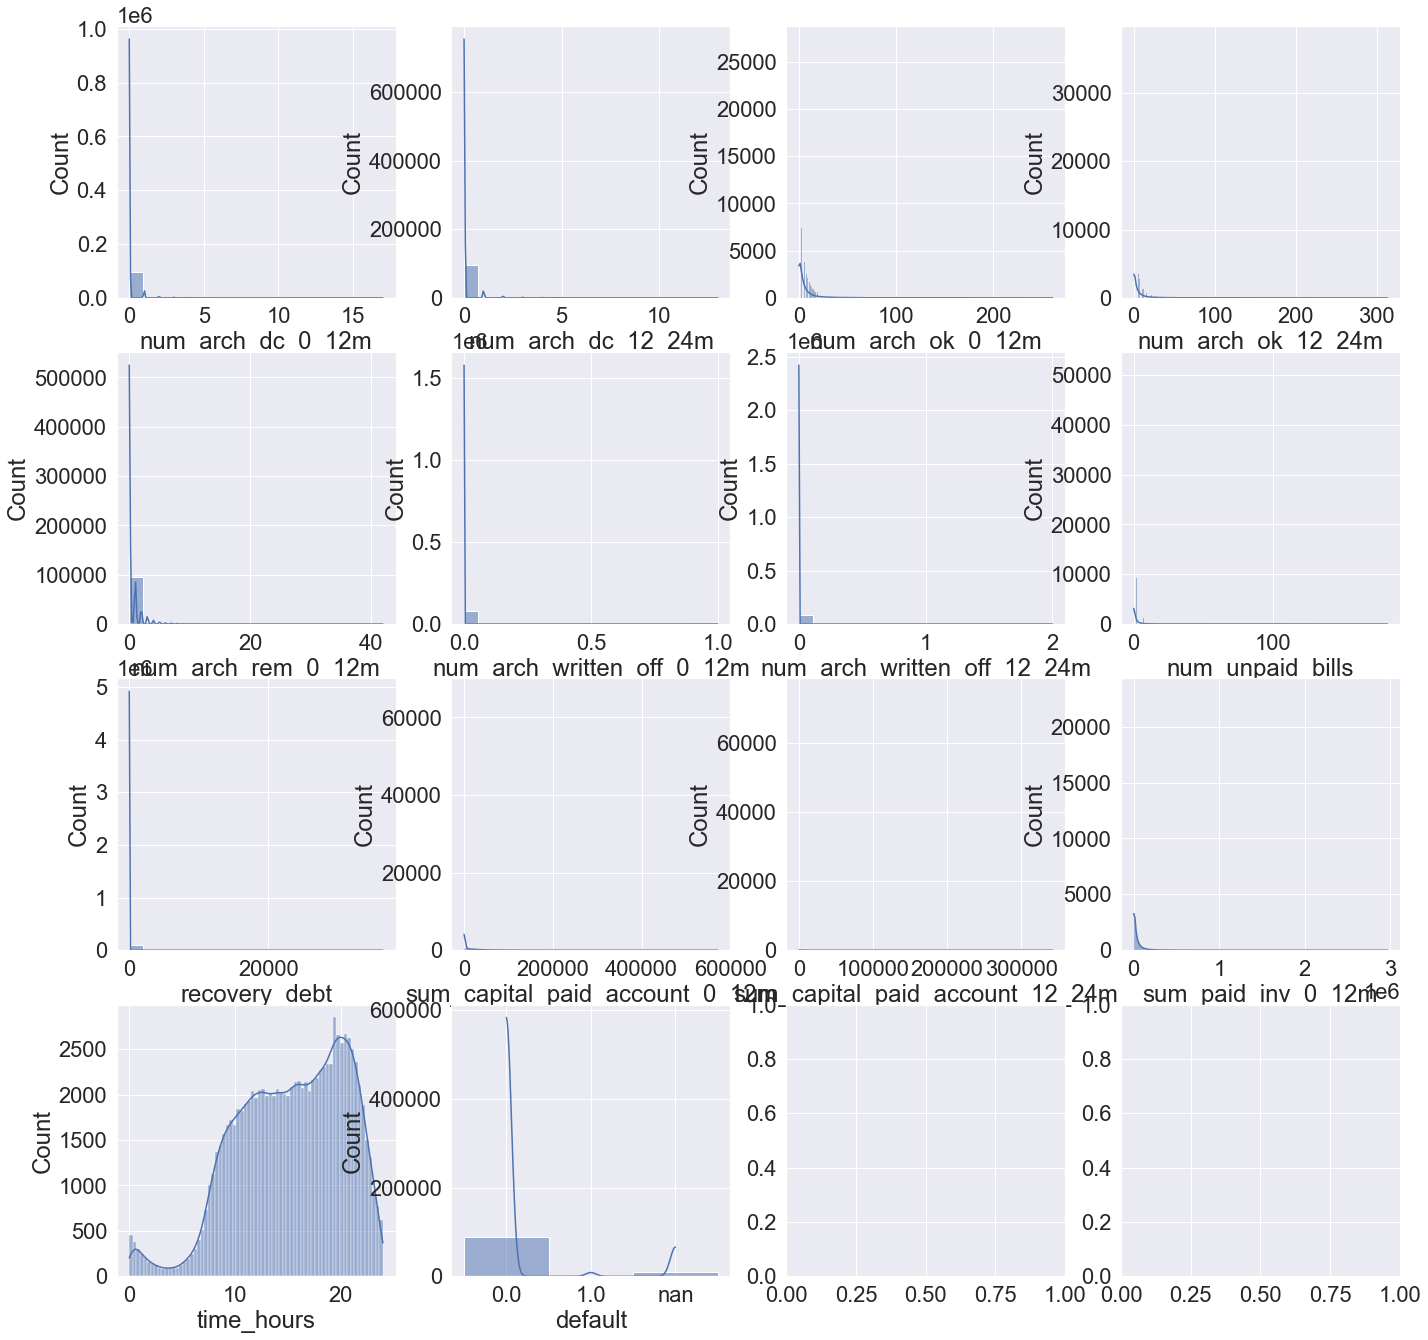

In [138]:
plot_multiple_histograms(df, num_cols[12:])

## Numerical to numerical - Heatmap and Scatter plot (pairplot)


In [159]:
dfx = df[num_features]

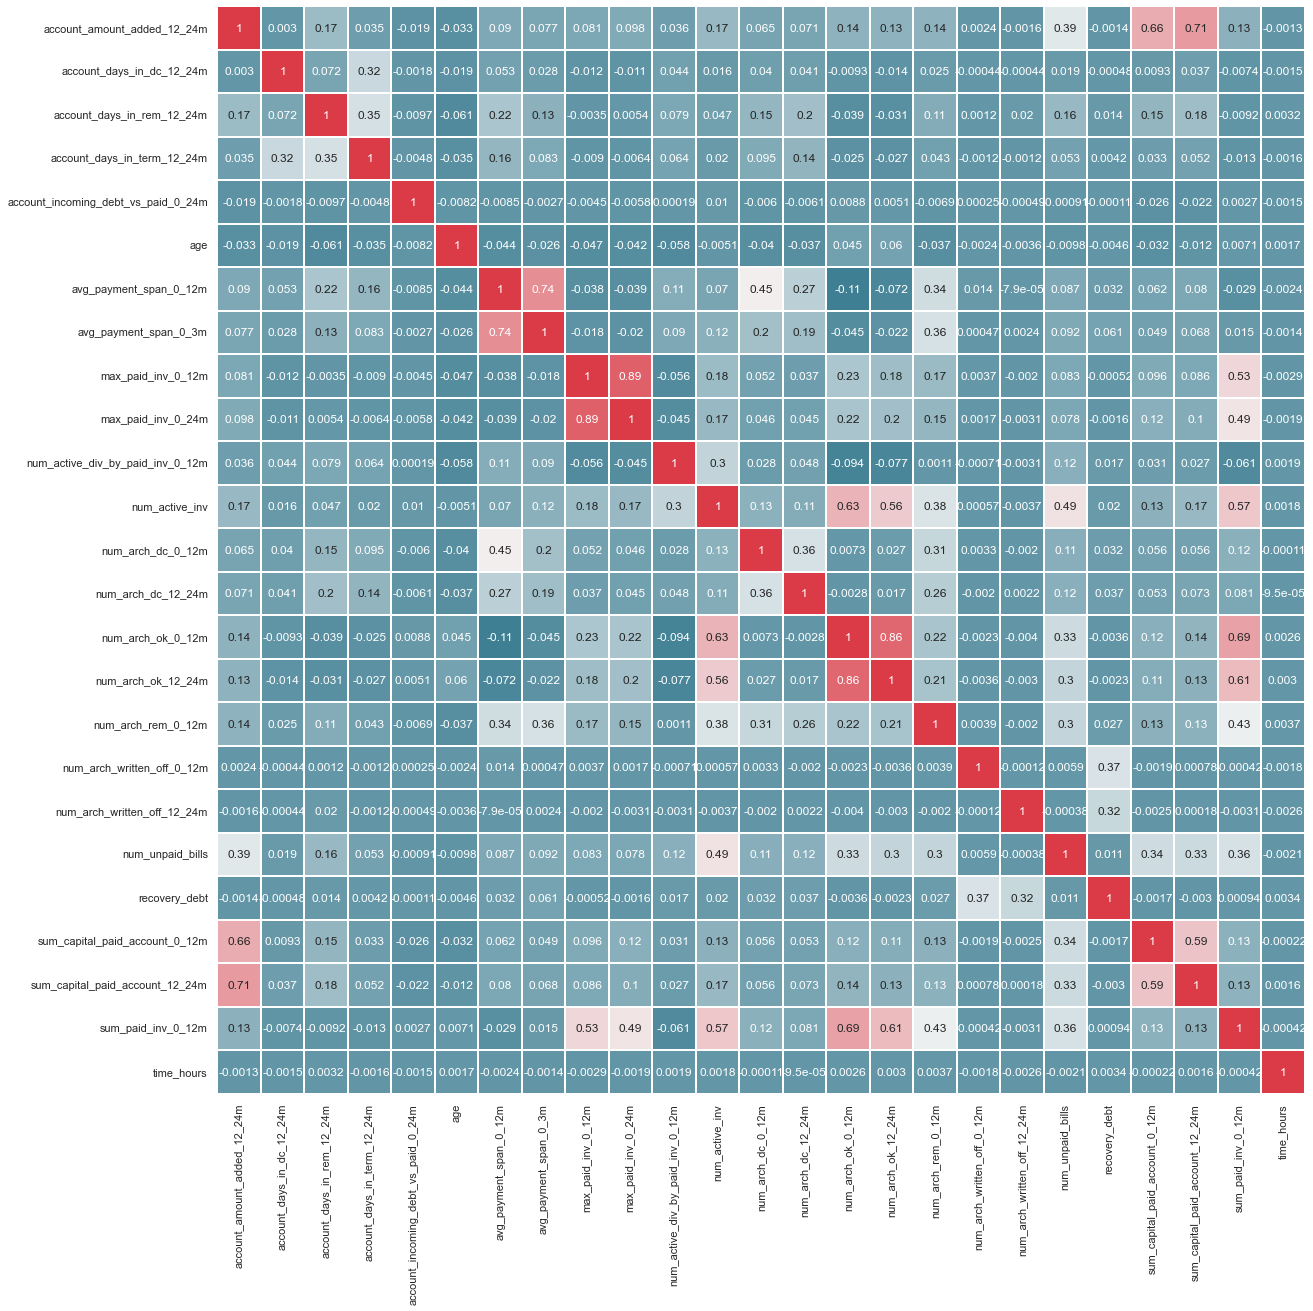

In [163]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(
        dfx.corr(), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar=False,
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
plt.show()


In [ ]:
['max_paid_inv_0_12m','avg_payment_span_0_3m','sum_capital_paid_account_12_24m', 'num_arch_ok_0_12m']

# Numerical x categorical features - box plot, pair plot with Hue

In [176]:
dfxx = df[num_cols]

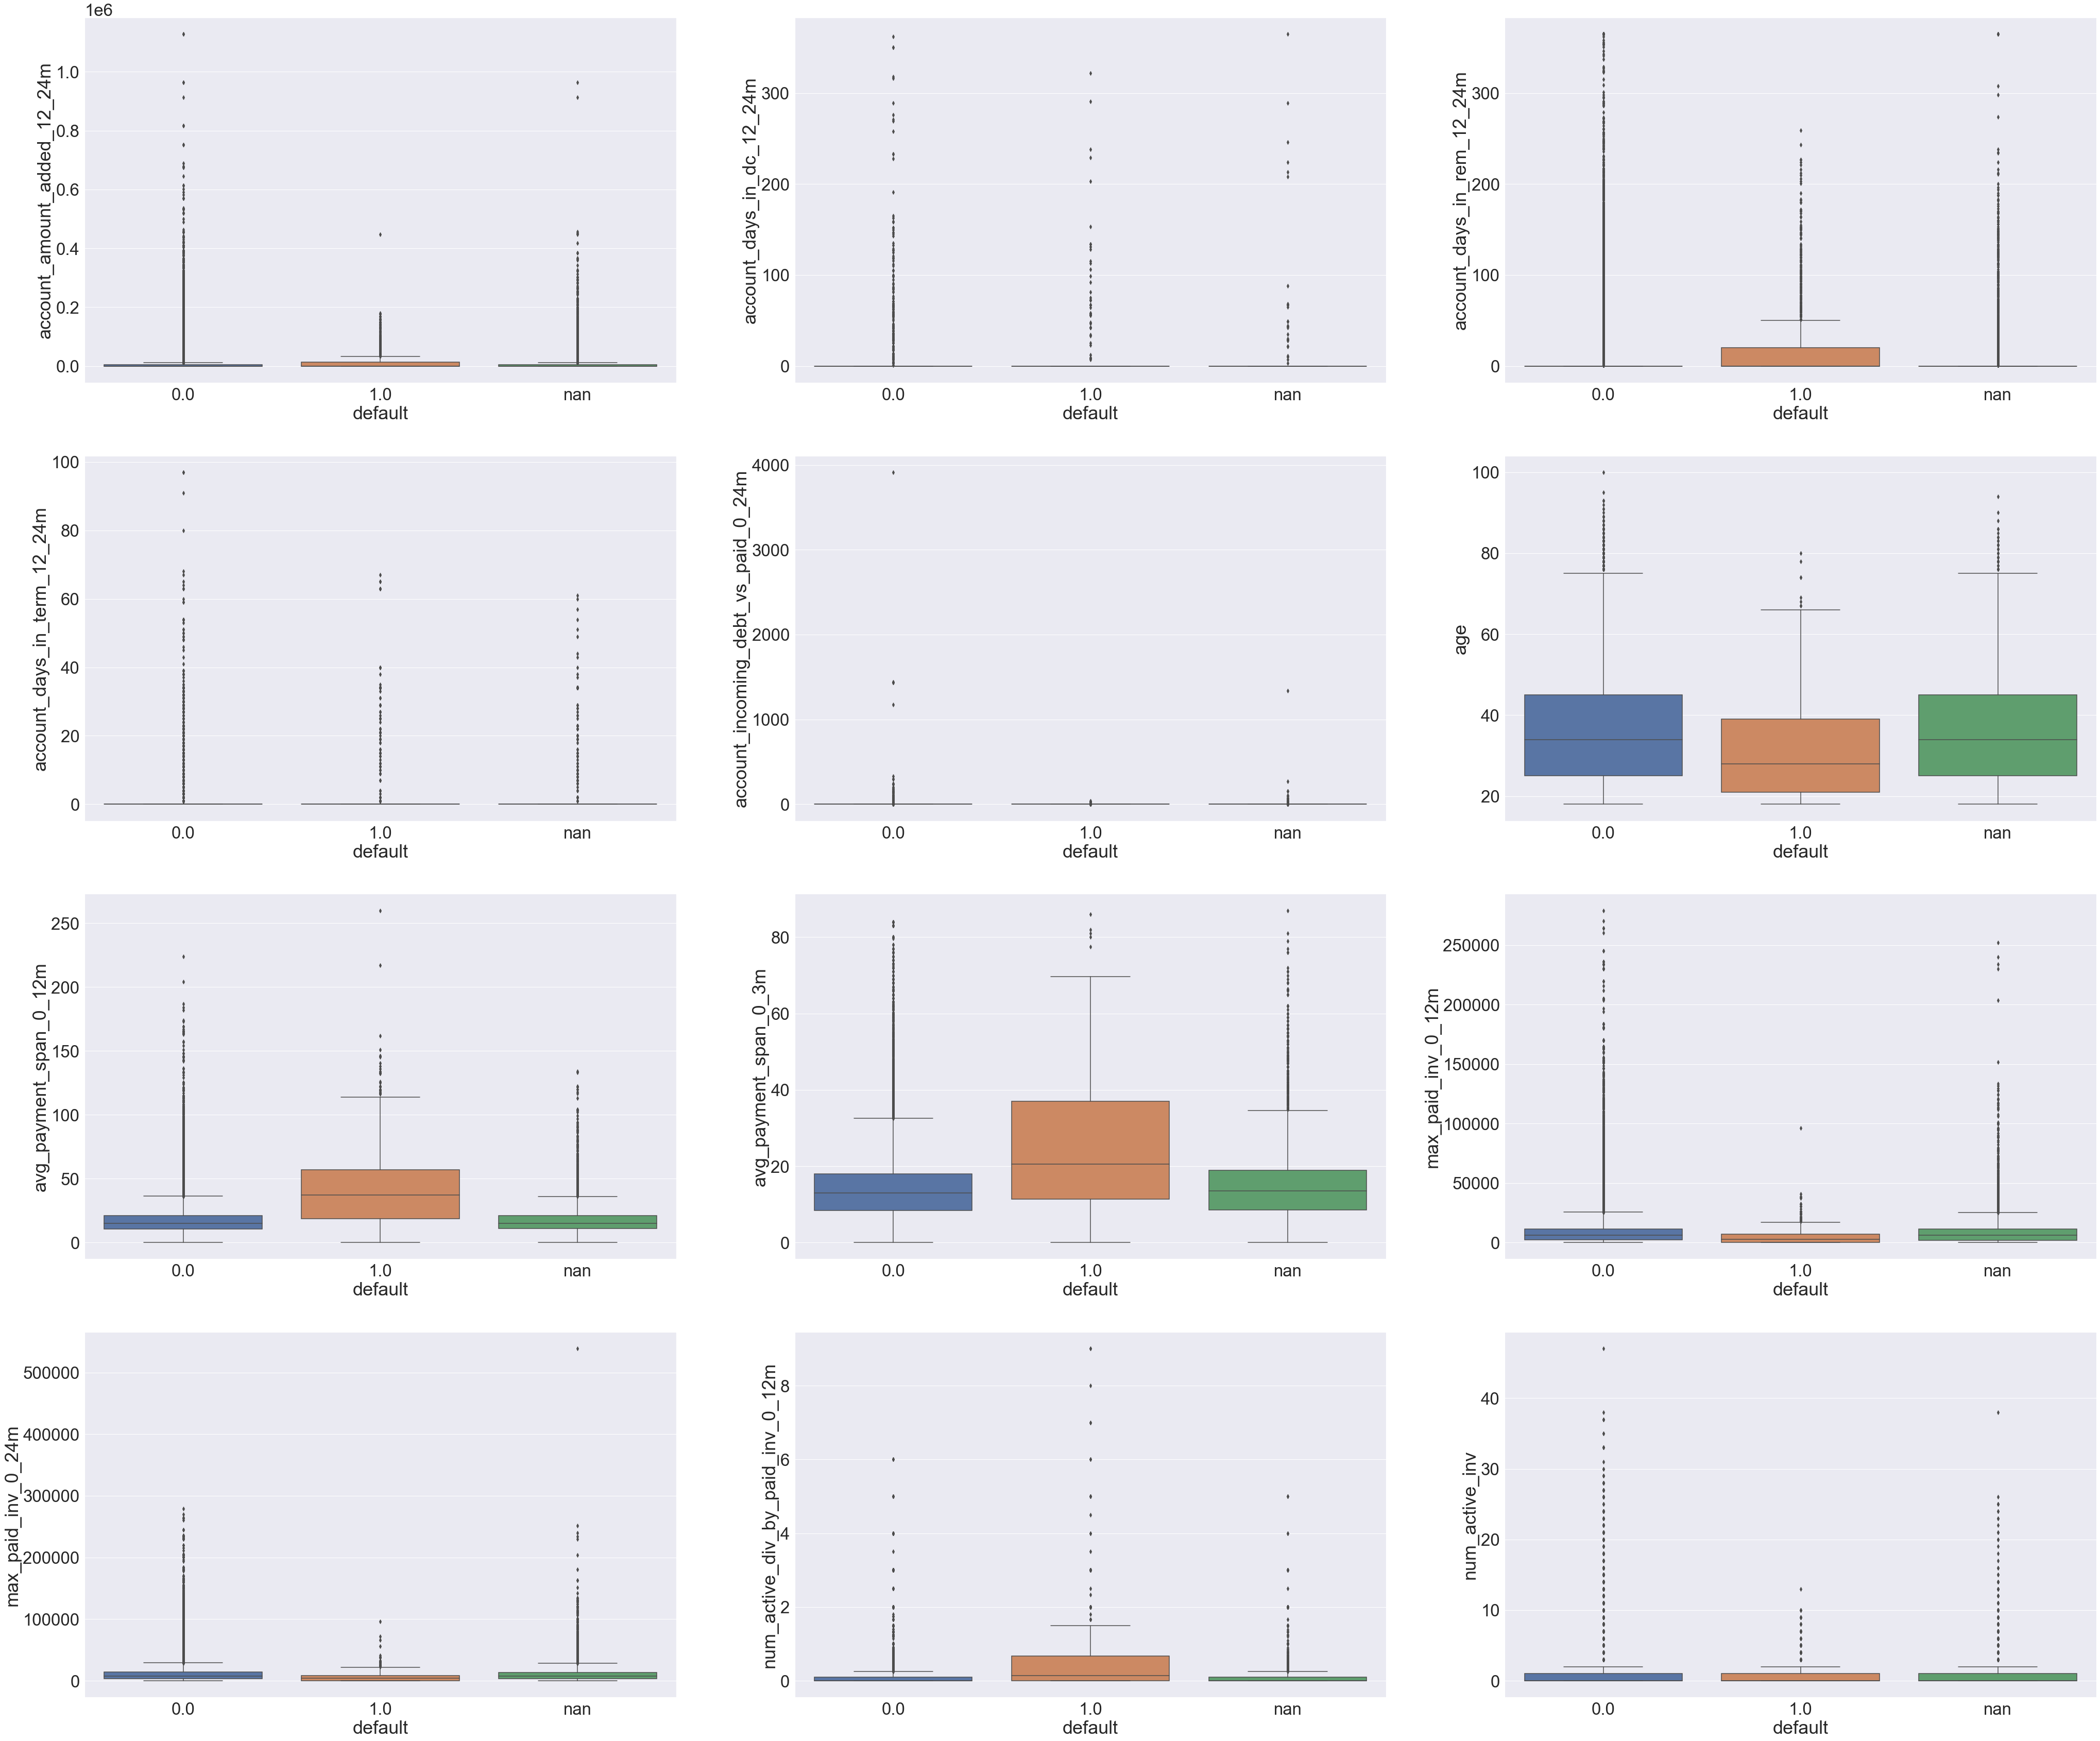

In [174]:
fig, ax = plt.subplots(4,3, figsize=(70, 60))
sns.set(font_scale=4)
for var, subplot in zip(num_cols[:12], ax.flatten()):
    sns.boxplot(x='default', y=var, data=df, ax=subplot)

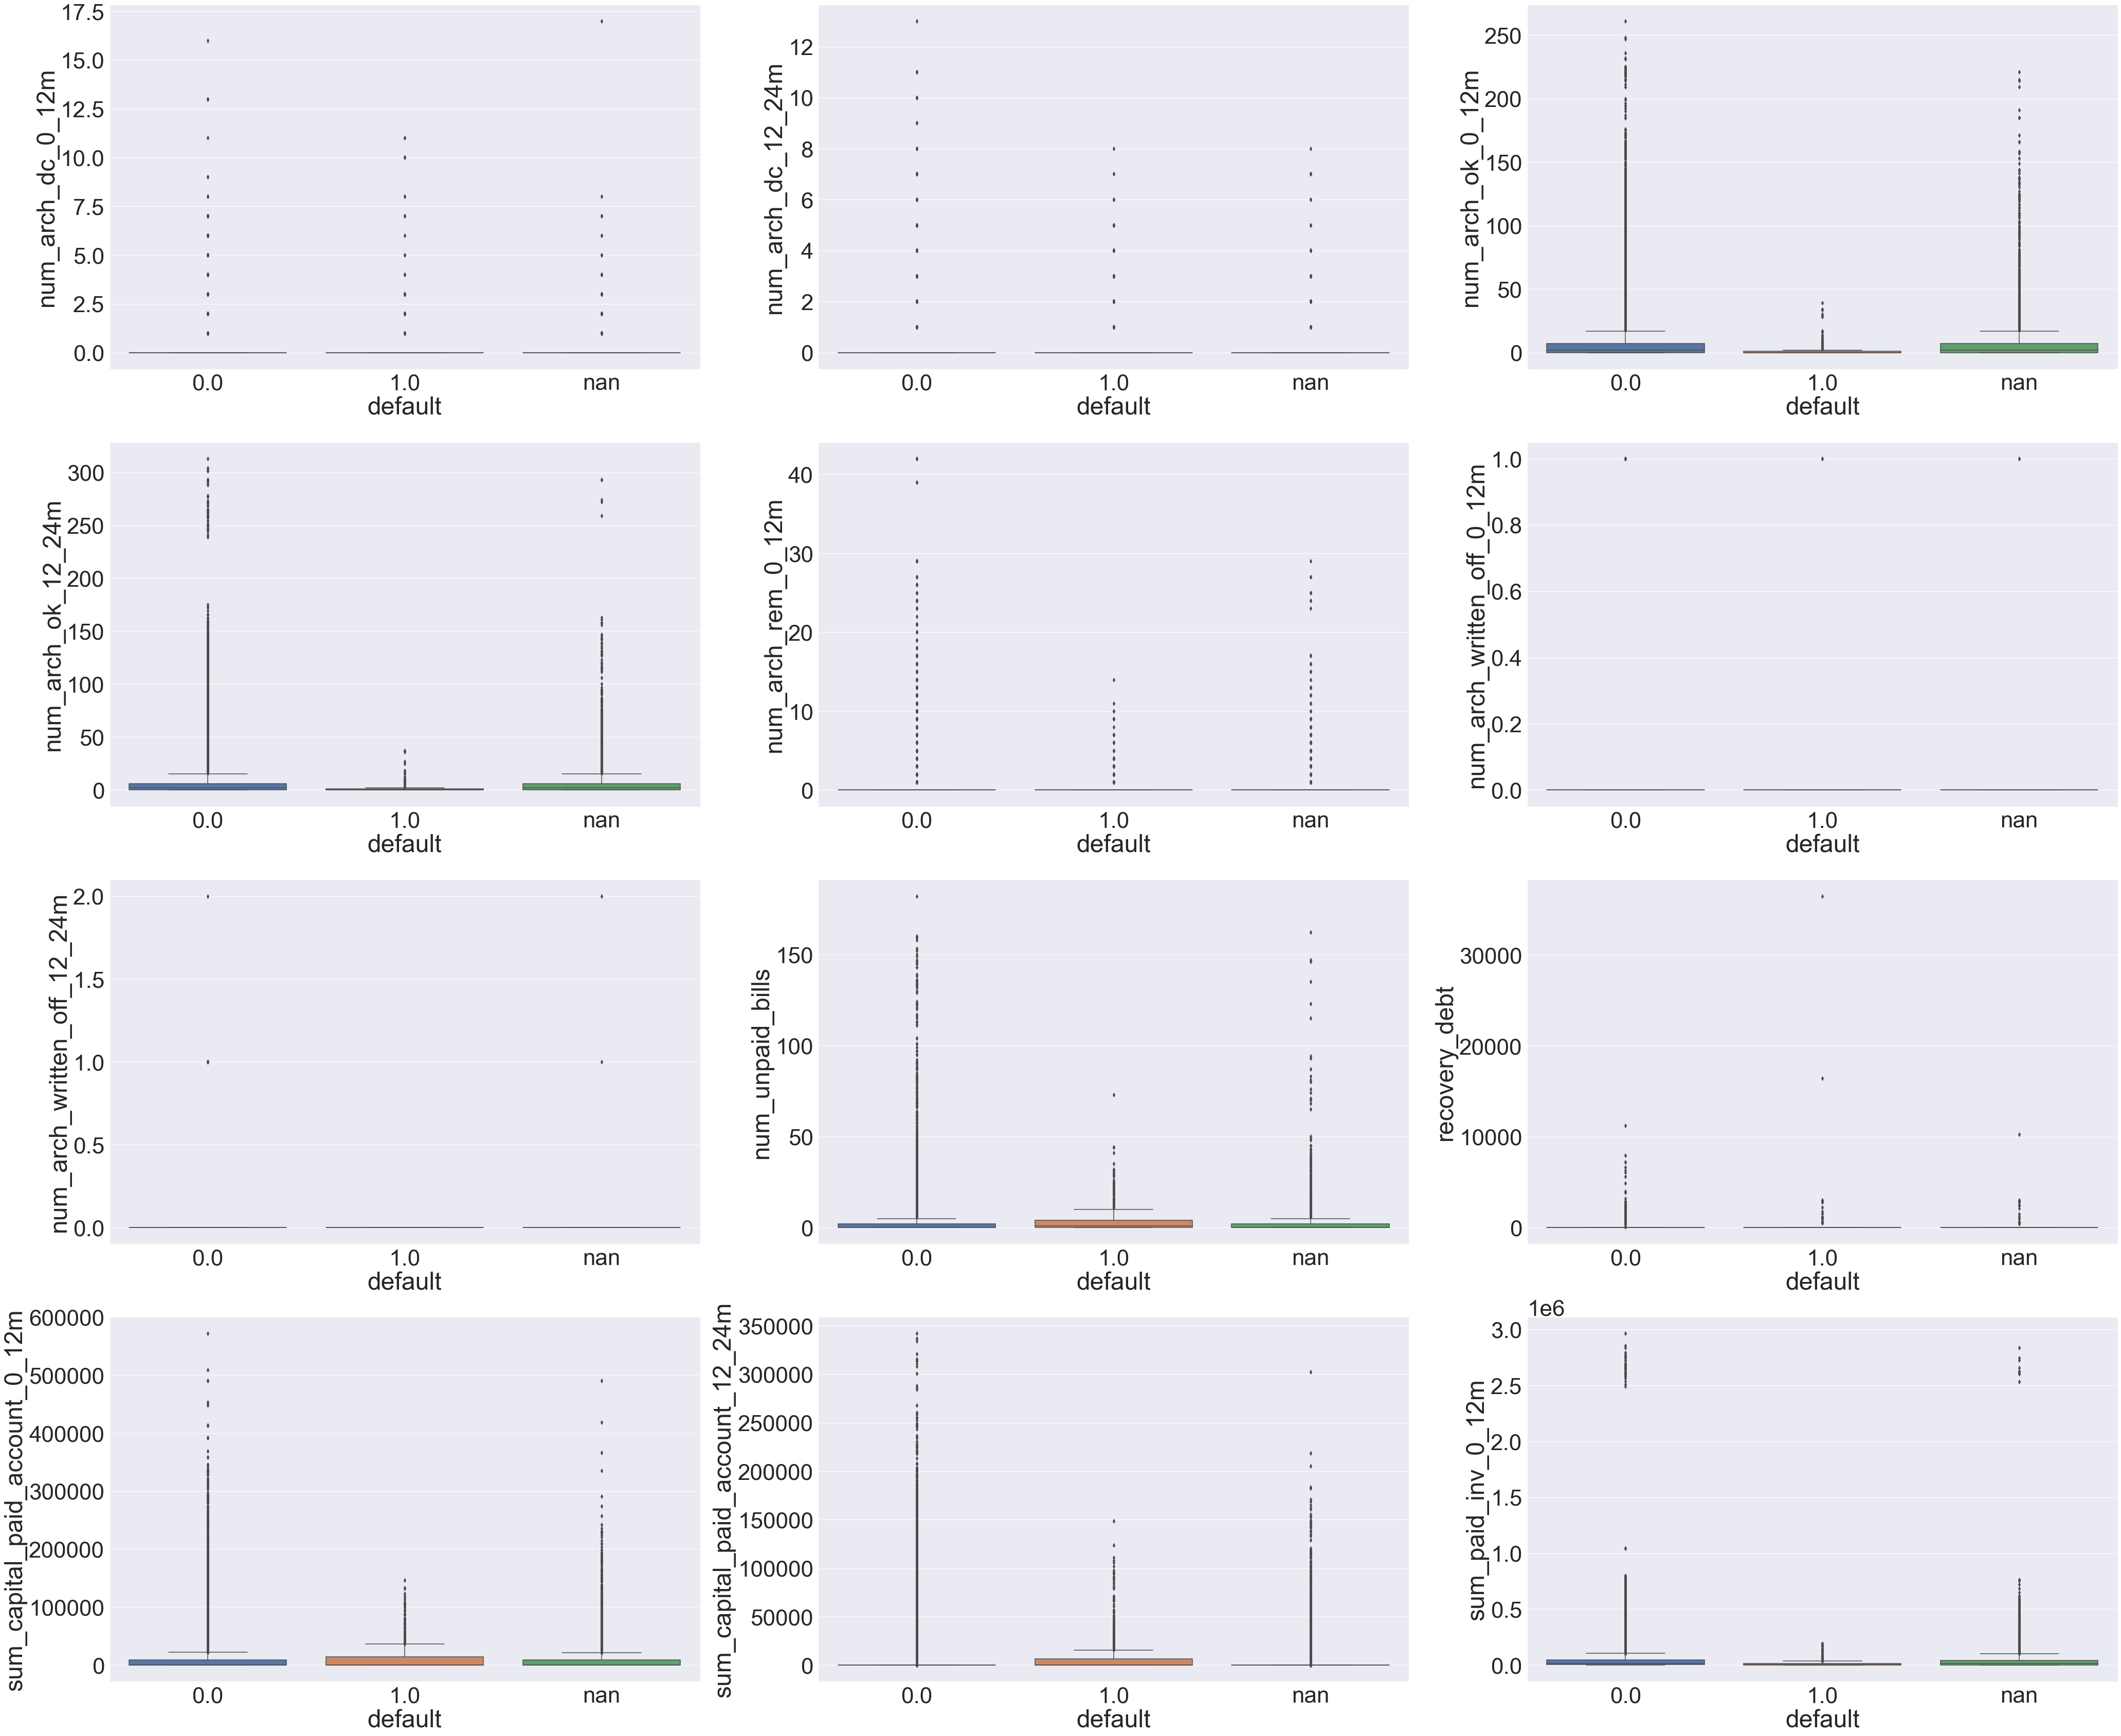

In [175]:
fig, ax = plt.subplots(4,3, figsize=(70, 60))
sns.set(font_scale=4)
for var, subplot in zip(num_cols[12:], ax.flatten()):
    sns.boxplot(x='default', y=var, data=df, ax=subplot)

In [194]:
missin_numerical = ['account_days_in_dc_12_24m', 'account_days_in_rem_12_24m', 'account_days_in_term_12_24m','account_incoming_debt_vs_paid_0_24m',
        'avg_payment_span_0_12m', 'avg_payment_span_0_3m','num_active_div_by_paid_inv_0_12m','num_arch_written_off_0_12m', 'num_arch_written_off_12_24m']



In [344]:
dfxx = df[['default', 'age', 'avg_payment_span_0_12m', 'avg_payment_span_0_3m']]

In [99]:
#to keep
#sns.pairplot(dfxx, hue = 'default')

# Preparing Data

## 1. Missing Data
Imputation according to the median of each category, if they are different
https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31


handle the missing values: 
- for categorial variables, we don't need to do anything, 
because pandas automatically convert NA to -1 for categorical variables. 
- for continuous variables, we need to replace NA with mean or median. 
- create a col_NA column to indicate which row has NAs.

In [39]:
df_numeric = df.select_dtypes(include='number')
na_cols = df_numeric.columns[df_numeric.isna().any()].tolist()

In [40]:
na_cols

['account_days_in_dc_12_24m',
 'account_days_in_rem_12_24m',
 'account_days_in_term_12_24m',
 'account_incoming_debt_vs_paid_0_24m',
 'avg_payment_span_0_12m',
 'avg_payment_span_0_3m',
 'num_active_div_by_paid_inv_0_12m',
 'num_arch_written_off_0_12m',
 'num_arch_written_off_12_24m']

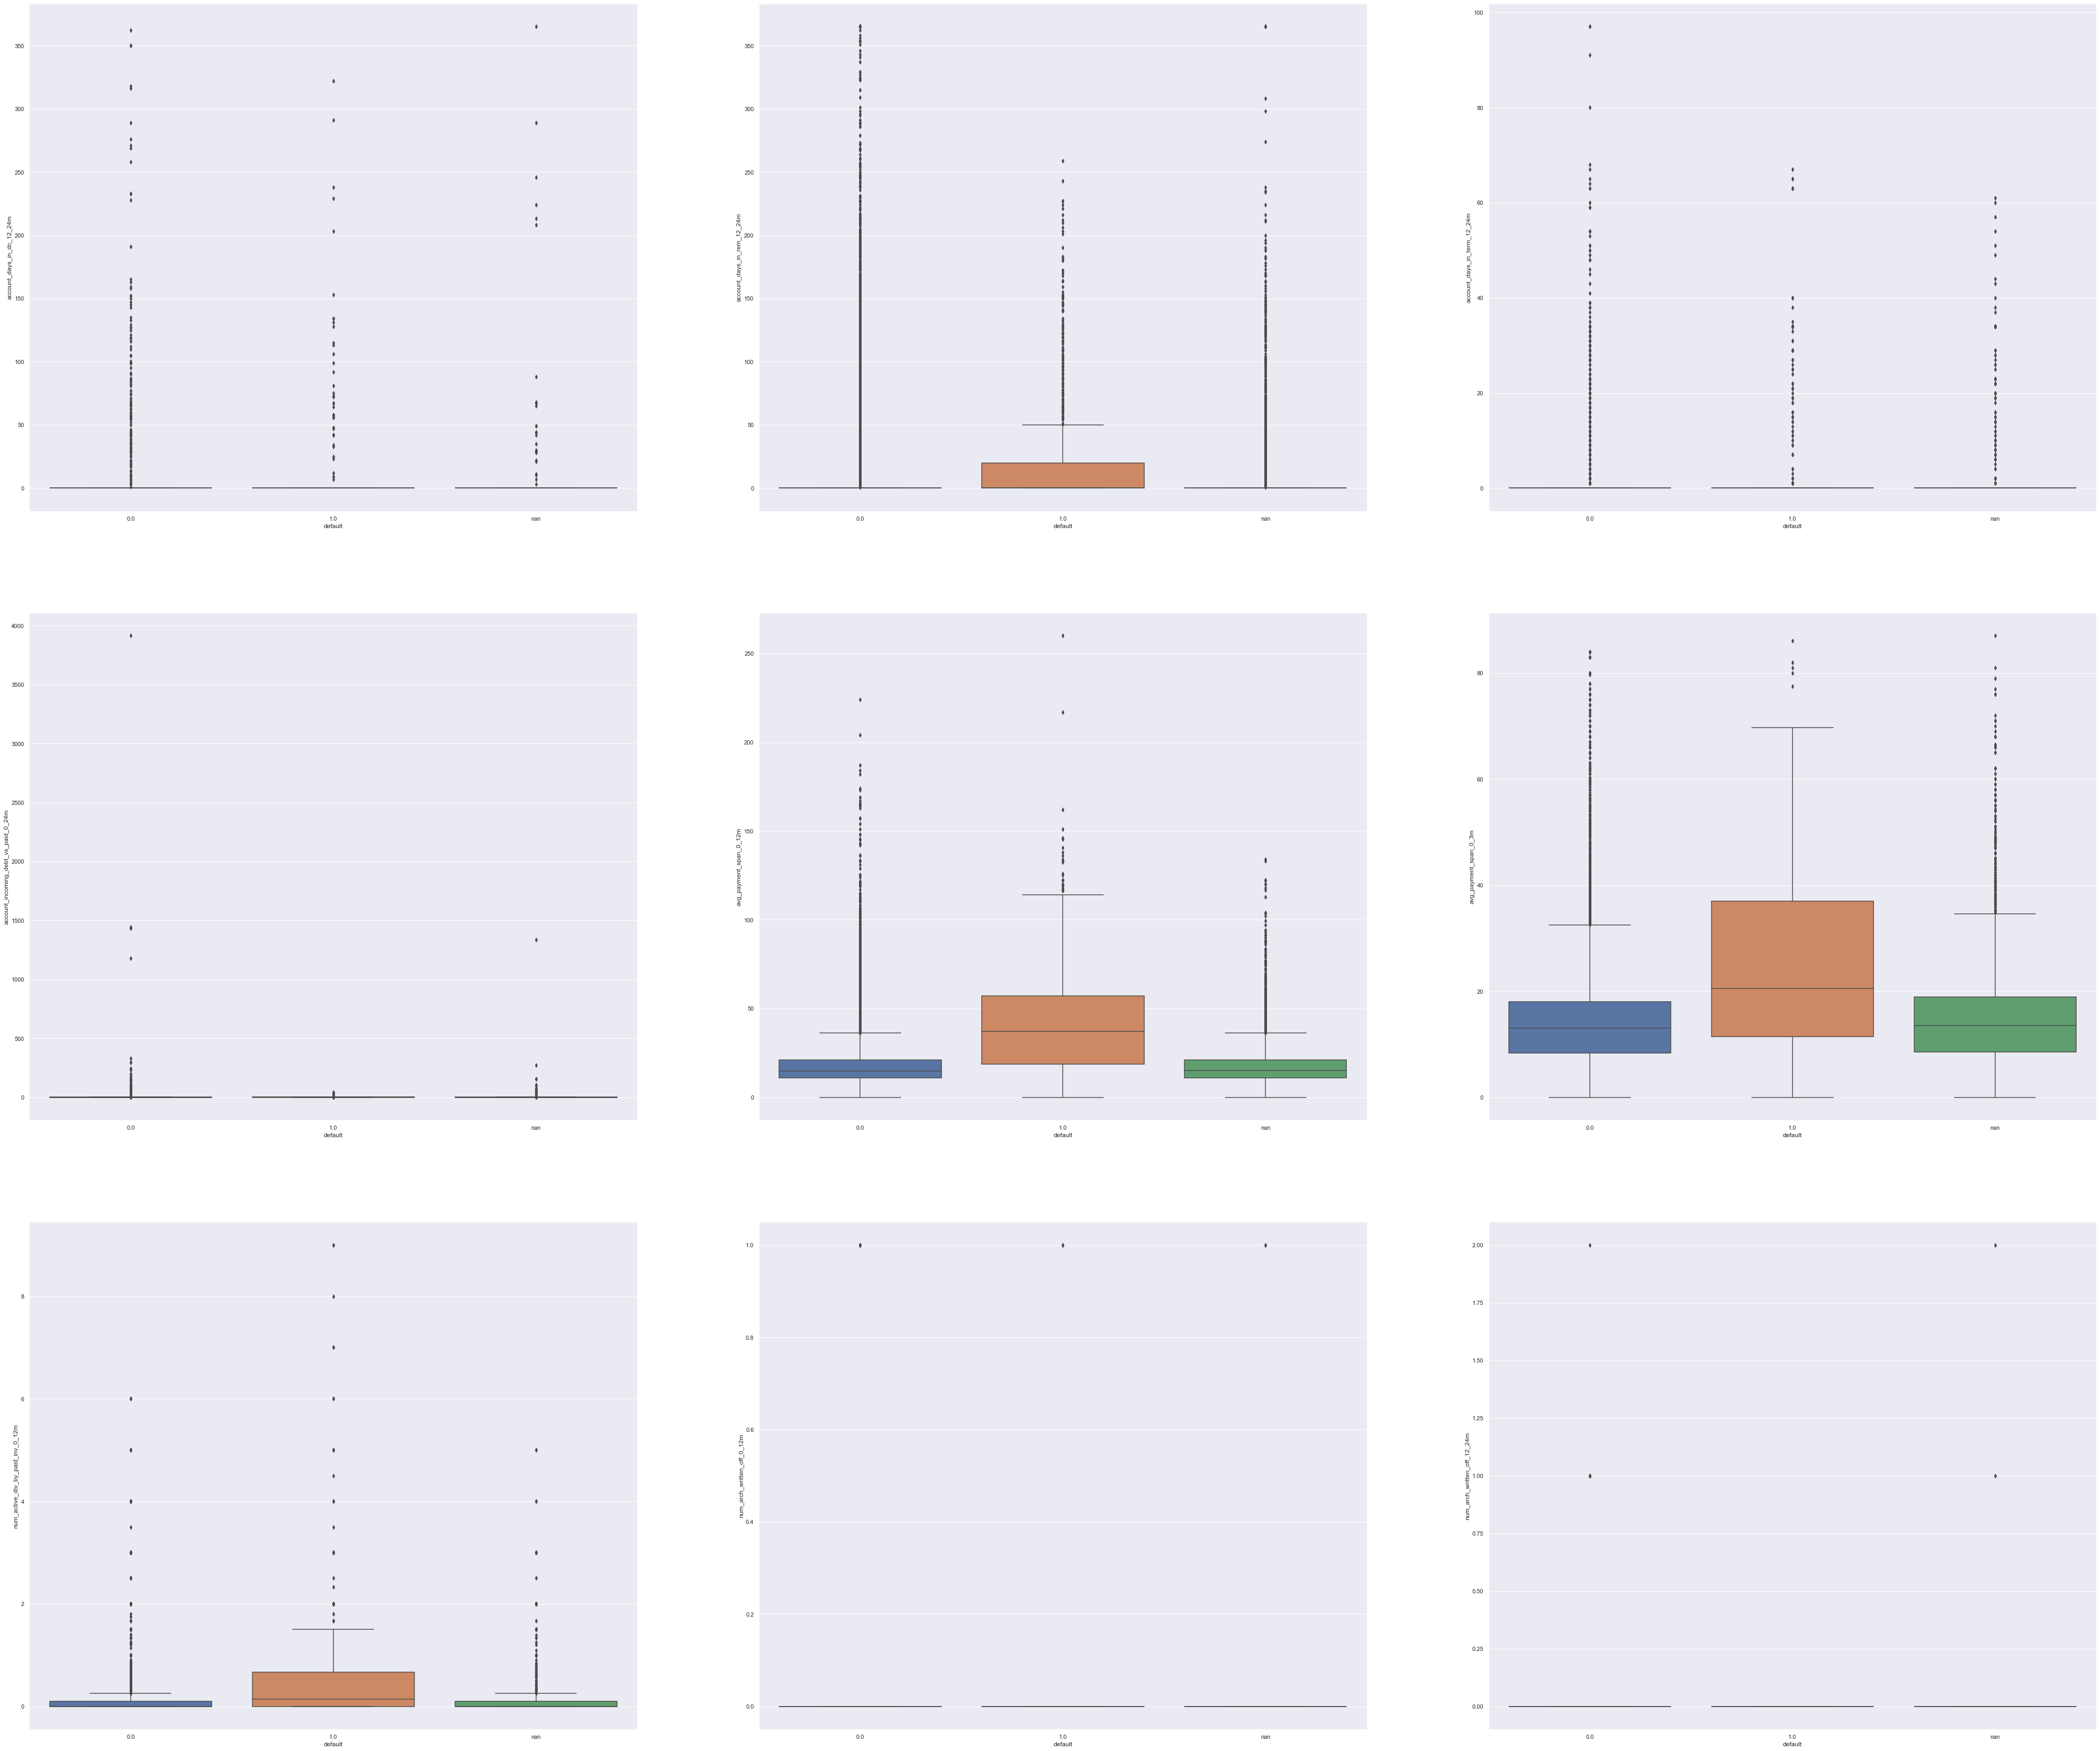

In [41]:
fig, ax = plt.subplots(3,3, figsize=(70, 60))
sns.set(font_scale=4)
for var, subplot in zip(na_cols, ax.flatten()):
    sns.boxplot(x='default', y=var, data=df, ax=subplot)

In [42]:
list_higher = ['avg_payment_span_0_12m','avg_payment_span_0_3m', 'account_days_in_rem_12_24m','num_active_div_by_paid_inv_0_12m' ]

In [43]:
# df['avg_payment_span_0_12m'] = df[df['default'] != 'nan'].groupby('default')['avg_payment_span_0_12m'].transform(lambda x: x.fillna(x.median()))
# df['avg_payment_span_0_3m'] = df[df['default'] != 'nan'].groupby('default')['avg_payment_span_0_3m'].transform(lambda x: x.fillna(x.median()))
# df['account_days_in_rem_12_24m'] = df[df['default'] != 'nan'].groupby('default')['account_days_in_rem_12_24m'].transform(lambda x: x.fillna(x.median()))
# df['num_active_div_by_paid_inv_0_12m'] = df[df['default'] != 'nan'].groupby('default')['num_active_div_by_paid_inv_0_12m'].transform(lambda x: x.fillna(x.median()))


In [ ]:
for c in list_higher:
    df[c] = df[df['default'] != 'nan'].groupby('default')[c].transform(lambda x: x.fillna(x.median()))

Removing Highly correlated Features

In [202]:
#Removing Highly Correlated Features
df2 = df.drop(['max_paid_inv_0_12m','avg_payment_span_0_3m','sum_capital_paid_account_12_24m', 'num_arch_ok_0_12m'], axis=1)

#X = np.asarray(df2)
#X[0:5]

In [292]:
#y = np.asarray(df2['default'])
#y[0:5]

array(['0.0', '0.0', '0.0', '0.0', '0.0'], dtype=object)

## 2. Categorical variable conversion
https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31


https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

## 1. Ordinal Encoding 

We do Ordinal encoding to ensure the encoding of variables retains the ordinal nature of the variable. This is reasonable only for ordinal variables, as I mentioned at the beginning of this article. This encoding looks almost similar to Label Encoding but slightly different as Label coding would not consider whether the variable is ordinal or not, and it will assign a sequence of integers

In [ ]:
label encoding better for ordinal data with high cardinality
one hot encoding better for low cardinality and not ordinal data

In [341]:
dict1 = {'1.0': 1, '2.0':2, '3.0':3, '4.0':4, 'nan':0}
dict2 = {'0': 0, '1':1, '2':2, '3':3, '4':4, '5':5}
dict3 = {'True': 0, 'False':1}

In [204]:
cols1

['account_status',
 'account_worst_status_0_3m',
 'account_worst_status_12_24m',
 'account_worst_status_3_6m',
 'account_worst_status_6_12m',
 'worst_status_active_inv']

In [342]:
for c in cols1:
    df2[c+'_ordinal'] = df2[c].map(dict1)

In [343]:
for c in cols2:
    df2[c+'_ordinal'] = df2[c].map(dict2)

In [344]:
hp = 'has_paid'
df2[hp+'_ordinal'] = df2['has_paid'].map(dict3)

In [1]:
#df2

In [208]:
cols3

['default',
 'has_paid',
 'name_in_email',
 'worst_status_active_inv',
 'merchant_group',
 'merchant_category']

# Feature Selection


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them.